## Importer les bibliothèques

In [2]:
import copy
import datetime
import random
from collections import Counter
from datetime import date

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_ta as ta
import plotly.graph_objects as go
import quandl
import seaborn as sns
import plotly.express as px

import yfinance as yf
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import read_csv
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR, SVC
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import xgboost as xgb
from yahoofinancials import YahooFinancials
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
import statsmodels.api as sm
from statsmodels.gam.generalized_additive_model import GLMGam
from nltk.corpus import treebank
from nltk.tag import hmm
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import KernelPCA
from tensorflow.keras.utils import plot_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn import preprocessing
from sklearn import utils
from sklearn import linear_model
from sklearn.linear_model import TweedieRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.linear_model import ElasticNet
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.cm as cm
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
from PIL import Image
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import TheilSenRegressor
from matplotlib import pyplot
from scipy import stats
from scipy.stats import jarque_bera
from statsmodels.stats.stattools import durbin_watson
from tensorflow.keras.models import Sequential
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pylab 
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures

### Importer la base de données de yahoo finance.

In [3]:
def yahoo_df(_start_date='2013-01-01', _end_date='2021-11-30',_time_interval='daily'):
    yahoo_financials = YahooFinancials("BTC-USD")
    dict_data = yahoo_financials.get_historical_price_data(start_date = _start_date, end_date = _end_date, time_interval='daily')
    data = pd.DataFrame(dict_data['BTC-USD']['prices'])
    _bitcoin_df = data.drop(["date"],axis = 1).rename(columns={'formatted_date': 'date'}).set_index(["date"])
    return _bitcoin_df

### Importer des bases de données en rapport avec la blockchain et Importer la base de données finale.

In [56]:
pd.options.display.max_rows = 6
data_with_na = pd.read_csv("data_with_na.csv")

## Traitement des données manquantes

### Premier traitement à l'aide l'interpolation.

In [57]:
def how_much_missing_date(data):
    '''
    Compte le nombre de données manquantes dans un dataframe
    '''
    data_with_na = data.copy()
    na_step_1 = pd.DataFrame(data_with_na.isna().sum(),columns=['données manquantes'])
    pd.options.display.max_rows = None
    return na_step_1

how_much_missing_date(data_with_na)

,données manquantes
date,0
high,4
low,4
open,4
close,4
volume,4
adjclose,4
blocks-size,1766
avg-block-size,1766
n-transactions-per-block,1766


In [58]:
data_interpolate = data_with_na.interpolate()
how_much_missing_date(data_interpolate)

,données manquantes
date,0
high,0
low,0
open,0
close,0
volume,0
adjclose,0
blocks-size,1
avg-block-size,1
n-transactions-per-block,1


### Deuxième traitement à l'aide d'Iterative Imputer. 

In [59]:
cov = data_interpolate.corr().style.background_gradient(cmap='coolwarm')
cov

,high,low,open,close,volume,adjclose,blocks-size,avg-block-size,n-transactions-per-block,n-payments-per-block,n-transactions-total,median-confirmation-time,avg-confirmation-time,total-bitcoins,market-price,market-cap,trade-volume,hash-rate,difficulty,transaction-fees,transaction-fees-usd,fees-usd-per-transaction,cost-per-transaction-percent,cost-per-transaction,n-unique-addresses,n-transactions,n-payments,transactions-per-second,output-volume,mempool-count,mempool-growth,mempool-size,utxo-count,n-transactions-excluding-popular,estimated-transaction-volume,estimated-transaction-volume-usd
high,1.000000,0.999012,0.999522,0.999480,0.750104,0.999480,0.779974,0.572268,0.307961,0.564827,0.768978,0.029854,0.150760,0.504548,0.998960,0.998401,0.424215,0.791089,0.788888,0.000707,0.515627,0.554392,-0.190672,0.942871,0.626939,0.279685,0.595831,0.096405,0.094759,0.156319,-0.009566,0.267377,-0.851774,0.316368,-0.429693,0.897296
low,0.999012,1.000000,0.999057,0.999384,0.739271,0.999384,0.781716,0.570577,0.307162,0.556314,0.770659,0.022568,0.146535,0.520824,0.998428,0.998197,0.408865,0.792627,0.789787,-0.008276,0.504237,0.542952,-0.184952,0.942114,0.623541,0.279571,0.589659,0.094477,0.094154,0.144311,-0.014155,0.255485,-0.853042,0.316447,-0.435906,0.888654
open,0.999522,0.999057,1.000000,0.998807,0.746724,0.998807,0.780443,0.571409,0.307291,0.561182,0.769407,0.027241,0.149597,0.513566,0.999051,0.998372,0.419364,0.791644,0.789361,-0.002498,0.512064,0.551235,-0.188118,0.942682,0.624771,0.278842,0.592691,0.094624,0.094590,0.151963,-0.012527,0.262225,-0.858257,0.315425,-0.432024,0.894168
close,0.999480,0.999384,0.998807,1.000000,0.745490,1.000000,0.780863,0.571488,0.307838,0.561372,0.769861,0.027104,0.149034,0.507423,0.998548,0.998314,0.418045,0.791788,0.789286,-0.003006,0.511055,0.549546,-0.188670,0.942540,0.626231,0.280164,0.593743,0.096040,0.094327,0.151576,-0.010749,0.262856,-0.857568,0.317153,-0.432405,0.893694
volume,0.750104,0.739271,0.746724,0.745490,1.000000,0.745490,0.785300,0.660141,0.481190,0.691843,0.786995,0.152735,0.124799,-0.430462,0.745308,0.743025,0.388074,0.843923,0.845573,0.007650,0.505914,0.527602,-0.220739,0.669951,0.653344,0.435783,0.688189,0.245982,-0.001371,0.228438,0.088277,0.298614,-0.064645,0.464386,-0.377334,0.781515
adjclose,0.999480,0.999384,0.998807,1.000000,0.745490,1.000000,0.780863,0.571488,0.307838,0.561372,0.769861,0.027104,0.149034,0.507423,0.998548,0.998314,0.418045,0.791788,0.789286,-0.003006,0.511055,0.549546,-0.188670,0.942540,0.626231,0.280164,0.593743,0.096040,0.094327,0.151576,-0.010749,0.262856,-0.857568,0.317153,-0.432405,0.893694
blocks-size,0.779974,0.781716,0.780443,0.780863,0.785300,0.780863,1.000000,0.839089,0.669032,0.694975,0.999661,0.121319,0.059271,0.998797,0.780483,0.777189,0.352813,0.948089,0.948520,-0.030550,0.341316,0.367589,-0.215529,0.740670,0.778779,0.625400,0.687023,0.199686,0.000496,0.009097,-0.052809,0.054469,0.934441,0.645124,-0.591888,0.717200
avg-block-size,0.572268,0.570577,0.571409,0.571488,0.660141,0.571488,0.839089,1.000000,0.891520,0.804099,0.843189,0.367513,0.181969,-0.430156,0.571556,0.566142,0.378375,0.745198,0.751752,0.245723,0.415441,0.428249,-0.448634,0.505476,0.871332,0.836700,0.749979,0.401192,0.051783,0.301836,0.216436,0.373776,0.561181,0.829489,-0.342328,0.603383
n-transactions-per-block,0.307961,0.307162,0.307291,0.307838,0.481190,0.307838,0.669032,0.891520,1.000000,0.612590,0.676934,0.356614,-0.005679,-0.470236,0.306830,0.301512,0.239667,0.550236,0.554861,0.313707,0.320308,0.297922,-0.404813,0.232416,0.793978,0.946465,0.546367,0.549524,0.041299,0.351251,0.278693,0.239708,0.446218,0.917577,-0.226879,0.378271
n-payments-per-block,0.564827,0.556314,0.561182,0.561372,0.691843,0.561372,0.694975,0.804099,0.612590,1.000000,0.702644,0.432364,0.093884,-0.359856,0.560435,0.561885,0.052336,0.690601,0.724955,0.318698,0.565285,0.553166,-0.548869,0.323781,0.773547,0.459943,0.866871,0.436171,0.318553,0.635500,0.323425,0.511994,-0.035661,0.513763,0.150234,0.632744


In [60]:
def imputation_by_iterativeimputer(df):
# Impute une base de données à en utilisant la méthode IterativeImputer
    _df = df # DataFrame
    _id =_df.index
    _col = df.columns
    imputation_mean = IterativeImputer(max_iter = 100, random_state=0 , initial_strategy = 'constant')
    imputation_mean.fit(_df)
    array_imputed_esp = imputation_mean.transform(_df)
    data_imputed_esp = pd.DataFrame(array_imputed_esp,columns = _col, index = _id )
    return data_imputed_esp

In [61]:
data_iterative = imputation_by_iterativeimputer(data_interpolate.set_index(["date"])).drop(["total-bitcoins","utxo-count"],axis =1)

In [62]:
how_much_missing_date(data_iterative)

,données manquantes
high,0
low,0
open,0
close,0
volume,0
adjclose,0
blocks-size,0
avg-block-size,0
n-transactions-per-block,0
n-payments-per-block,0


Il ne reste plus de valeurs manquantes.

In [63]:
final_data = data_iterative

## Analyse descriptive des données 

In [64]:
final_data.index = final_data.index.astype(dtype ='datetime64[ns]')
# Variable que l'on souhaite prédire.
final_data['Predict close'] = final_data['close'].shift(-10)

In [65]:
pd.options.display.max_rows = 12
final_data

,high,low,open,close,volume,adjclose,blocks-size,avg-block-size,n-transactions-per-block,n-payments-per-block,...,n-payments,transactions-per-second,output-volume,mempool-count,mempool-growth,mempool-size,n-transactions-excluding-popular,estimated-transaction-volume,estimated-transaction-volume-usd,Predict close
date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015,167.759799,0.141939,108.504796,-238.199430,...,-62441.869313,-0.129473,-8.383584e+04,-24942.976176,534.913517,-3.596043e+04,19493.979193,123190.680341,5.708656e+07,399.519989
2014-09-18,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002,23614.028926,0.236703,432.201117,97.635334,...,22391.773224,0.476450,1.541272e+05,-17354.759086,678.279133,5.342266e+06,69500.358825,140904.272626,6.131406e+07,377.181000
2014-09-19,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990,23653.116387,0.230467,409.678794,65.599081,...,19465.874142,0.483823,7.092072e+05,-17780.596702,685.831122,4.063078e+06,69437.000000,158617.864911,6.554157e+07,375.467010
2014-09-20,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992,23692.203847,0.224232,387.156470,84.410850,...,21719.613630,0.498221,6.526509e+05,-17277.663207,704.165236,4.732963e+06,70721.000000,176331.457197,6.976907e+07,386.944000
2014-09-21,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014,23731.291308,0.217996,364.634146,92.116035,...,23268.519574,0.490610,5.960945e+05,-17723.864888,704.559223,5.044085e+06,72005.000000,170057.252351,6.751127e+07,383.614990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-08,51171.375000,48765.988281,50667.648438,50504.796875,2.847970e+10,50504.796875,377757.062005,1.406416,2105.270073,4300.005952,...,722401.000000,3.566667,3.819393e+06,1237.000000,1165.400000,5.340365e+05,312397.000000,107792.284098,5.995006e+09,NaN
2021-12-09,50797.164062,47358.351562,50450.082031,47672.121094,2.960358e+10,47672.121094,377757.062005,1.406416,2105.270073,4300.005952,...,722401.000000,3.566667,3.819393e+06,1237.000000,1165.400000,5.340365e+05,312397.000000,107792.284098,5.995006e+09,NaN
2021-12-10,50015.253906,47023.699219,47642.144531,47243.304688,3.096601e+10,47243.304688,377757.062005,1.406416,2105.270073,4300.005952,...,722401.000000,3.566667,3.819393e+06,1237.000000,1165.400000,5.340365e+05,312397.000000,107792.284098,5.995006e+09,NaN


### Représenation graphique

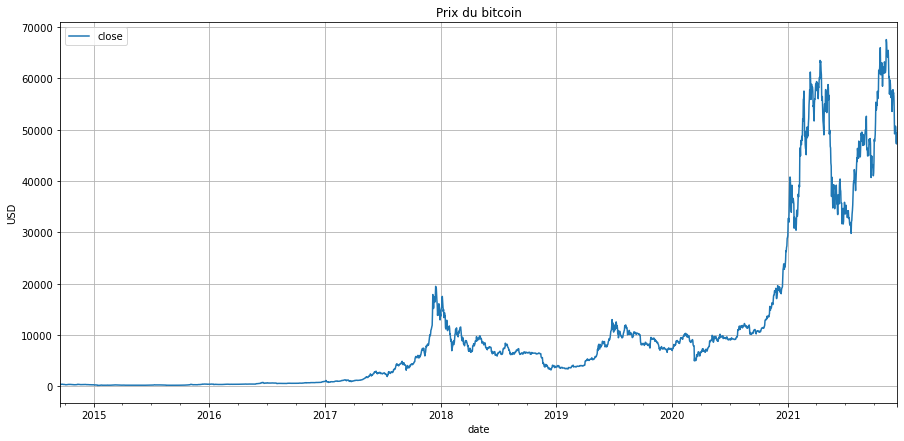

In [66]:
def show_graphic(data,x='date' ,y="close",title = "Prix du bitcoin", ylabel = "USD" ):
    final_data = data.copy()
    final_data.reset_index().plot(x=x,y = y,figsize=(15,7),grid=True)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
show_graphic(final_data)

### Histogramme

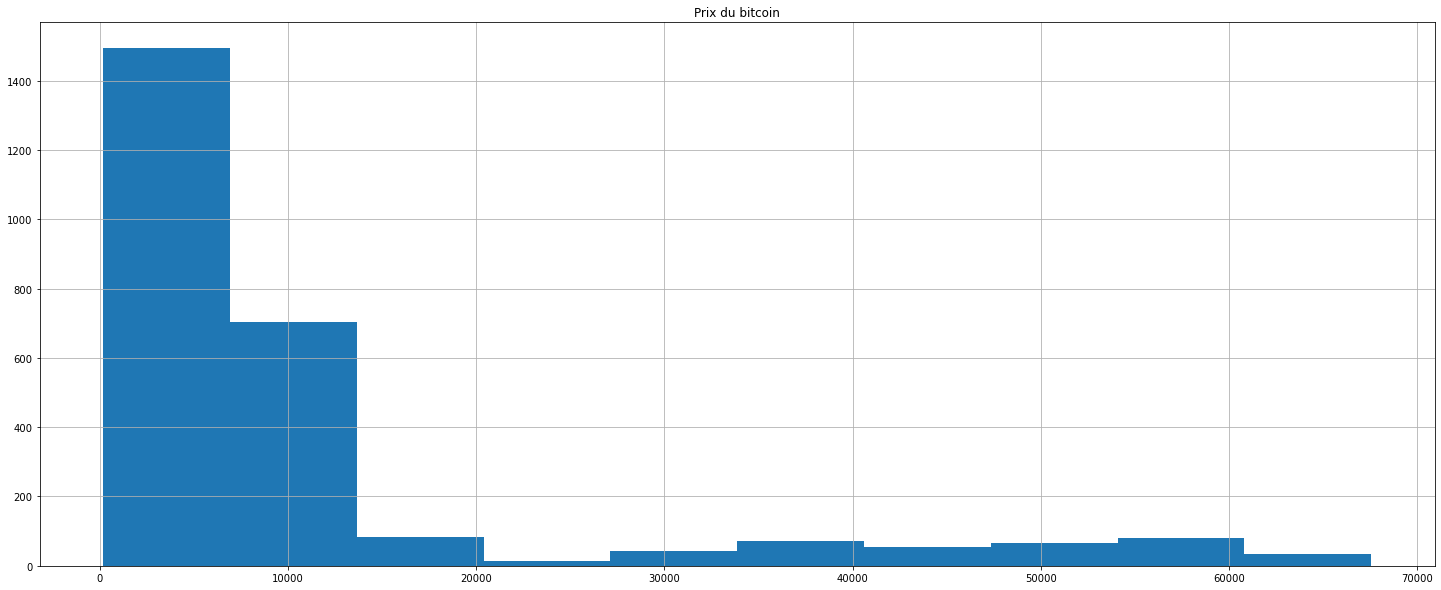

In [67]:
def histogram(data,feature, title = "Prix du bitcoin"):
    final_data = data.copy()
    final_data.hist(f"{feature}",figsize=(25,10))
    plt.title(title)
    plt.show()
histogram(final_data,"close")

### Coefficient de corrélation de Pearson

In [68]:
def show_correlation_between(feature_1,data):
    final_data = data.copy()
    corr = final_data.corr().loc[[f"{feature_1}"],:].sort_values(by=f"{feature_1}",axis=1).drop(columns=[f"{feature_1}"])
    plt.figure(figsize = (35,5))
    sns.heatmap(corr,cmap='tab10',square=True,annot=True,cbar=False,annot_kws={"fontsize":16},linewidths=1, linecolor='black',)
    plt.title("Correlation avec les autres variables")
    plt.show()   

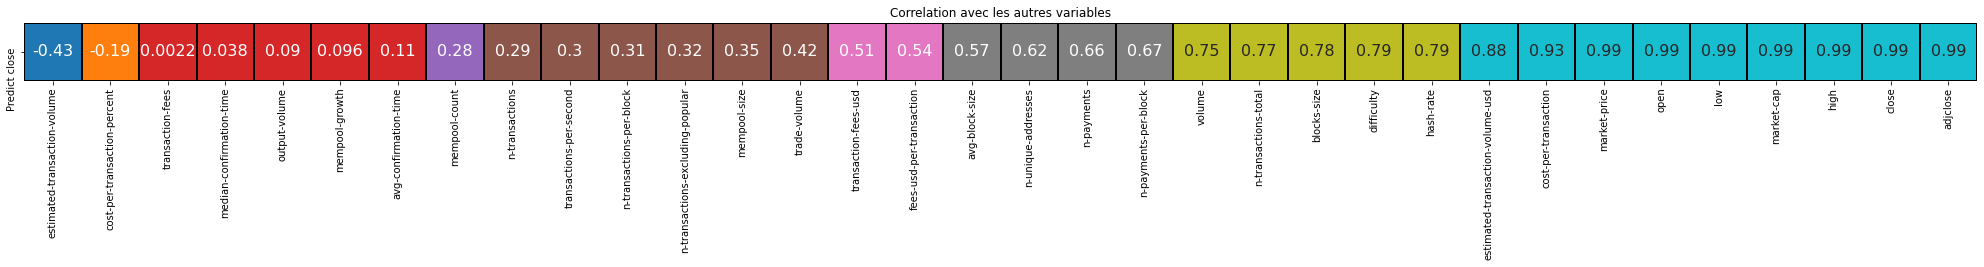

In [69]:
show_correlation_between("Predict close",final_data)

### Q-Q-plot

In [70]:
def QQ_plot(liste):
    ,
    fig,axs = plt.subplots(1,len(liste),sharey=False,figsize=(7*len(liste),7))
    colors = plt.rcParams["axes.prop_cycle"]()
    for i,feat in enumerate(liste):
        x = sorted(list(final_data["close"]))
        y = sorted(list(final_data[feat]))

        axs[i].scatter(x,y,marker=".",color=next(colors)["color"],label=feat)

        line = mlines.Line2D([0, 1], [0, 1], color='black',linestyle=':',label='Normal Line')
        transform = axs[i].transAxes
        line.set_transform(transform)
        axs[i].add_line(line)
        axs[i].set_ylabel(feat)
        axs[i].grid()
        axs[i].set_xlabel("close")
        axs[i].legend()
    plt.savefig('qq_plot_1.png')
    plt.show()

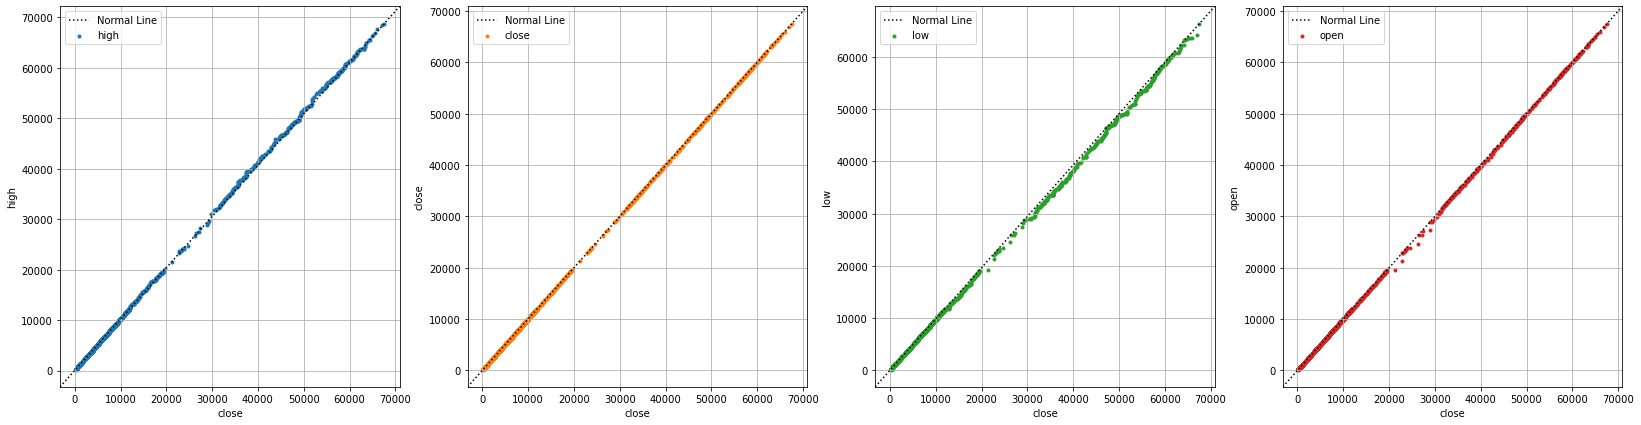

In [71]:
liste_1 = ['high','close','low','open']
QQ_plot(liste_1)

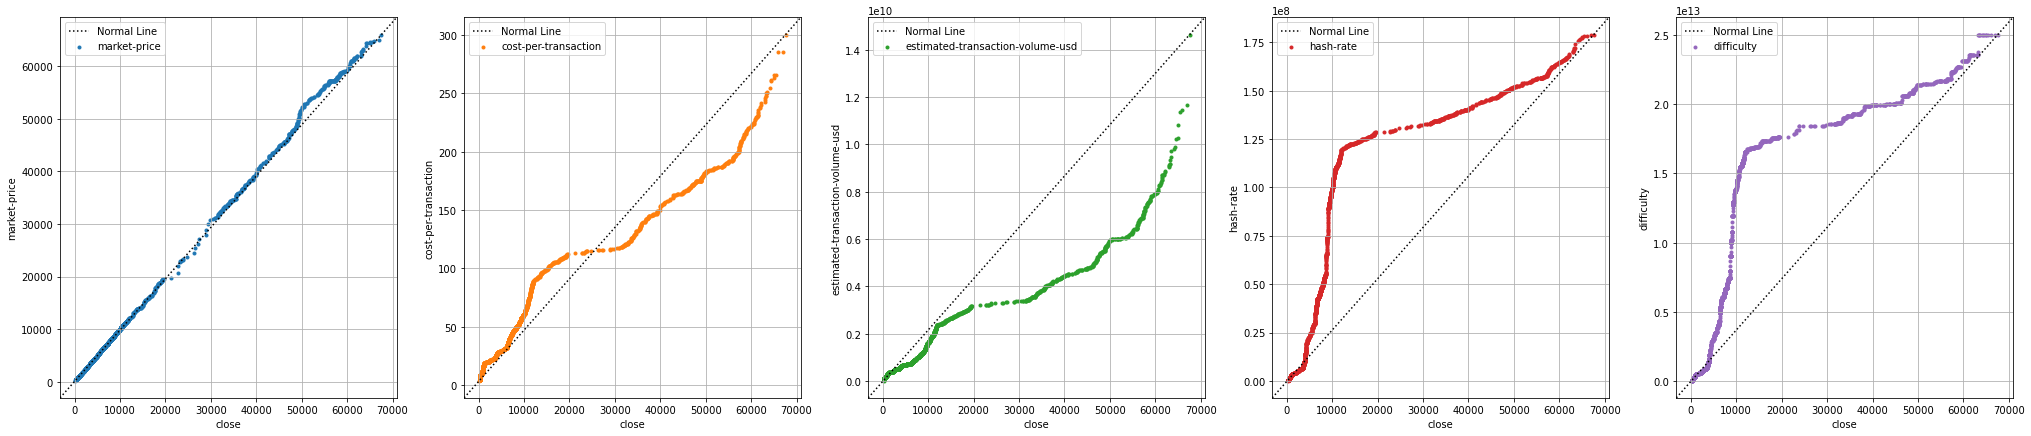

In [72]:
liste_2 = ['market-price','cost-per-transaction','estimated-transaction-volume-usd','hash-rate', 'difficulty']
QQ_plot(liste_2)

### Marice de correlation

In [73]:
final_data.corr().style.background_gradient(cmap='coolwarm')

,high,low,open,close,volume,adjclose,blocks-size,avg-block-size,n-transactions-per-block,n-payments-per-block,n-transactions-total,median-confirmation-time,avg-confirmation-time,market-price,market-cap,trade-volume,hash-rate,difficulty,transaction-fees,transaction-fees-usd,fees-usd-per-transaction,cost-per-transaction-percent,cost-per-transaction,n-unique-addresses,n-transactions,n-payments,transactions-per-second,output-volume,mempool-count,mempool-growth,mempool-size,n-transactions-excluding-popular,estimated-transaction-volume,estimated-transaction-volume-usd,Predict close
high,1.000000,0.999012,0.999522,0.999480,0.750104,0.999480,0.779920,0.572114,0.308164,0.672299,0.768928,0.030244,0.136966,0.998960,0.998401,0.424314,0.791089,0.788964,0.001055,0.515686,0.554436,-0.190672,0.942865,0.626727,0.279923,0.660007,0.295314,0.095118,0.268801,0.094670,0.337828,0.316779,-0.429693,0.897296,0.987129
low,0.999012,1.000000,0.999057,0.999384,0.739271,0.999384,0.781661,0.570425,0.307367,0.669065,0.770609,0.022962,0.132986,0.998428,0.998197,0.408968,0.792627,0.789863,-0.007924,0.504298,0.542998,-0.184952,0.942108,0.623338,0.279810,0.657458,0.294398,0.094514,0.258819,0.090923,0.327277,0.316860,-0.435906,0.888654,0.986851
open,0.999522,0.999057,1.000000,0.998807,0.746724,0.998807,0.780388,0.571256,0.307495,0.670762,0.769357,0.027632,0.135878,0.999051,0.998373,0.419465,0.791644,0.789436,-0.002149,0.512124,0.551279,-0.188118,0.942676,0.624562,0.279081,0.658493,0.294166,0.094949,0.265121,0.092151,0.333221,0.315837,-0.432024,0.894168,0.986169
close,0.999480,0.999384,0.998807,1.000000,0.745490,1.000000,0.780809,0.571336,0.308041,0.671039,0.769811,0.027497,0.135333,0.998548,0.998314,0.418146,0.791788,0.789362,-0.002656,0.511115,0.549591,-0.188670,0.942533,0.626021,0.280402,0.659246,0.295277,0.094687,0.264891,0.093758,0.333833,0.317564,-0.432405,0.893694,0.987624
volume,0.750104,0.739271,0.746724,0.745490,1.000000,0.745490,0.785268,0.659916,0.481174,0.756998,0.786961,0.153107,0.111204,0.745396,0.743069,0.388188,0.843923,0.845638,0.008028,0.505979,0.527651,-0.220739,0.669973,0.653161,0.435808,0.721214,0.409175,-0.000934,0.338080,0.184981,0.370170,0.464508,-0.377334,0.781515,0.746821
adjclose,0.999480,0.999384,0.998807,1.000000,0.745490,1.000000,0.780809,0.571336,0.308041,0.671039,0.769811,0.027497,0.135333,0.998548,0.998314,0.418146,0.791788,0.789362,-0.002656,0.511115,0.549591,-0.188670,0.942533,0.626021,0.280402,0.659246,0.295277,0.094687,0.264891,0.093758,0.333833,0.317564,-0.432405,0.893694,0.987624
blocks-size,0.779920,0.781661,0.780388,0.780809,0.785268,0.780809,1.000000,0.839188,0.669426,0.899653,0.999662,0.122134,0.032613,0.780418,0.777133,0.352934,0.948025,0.948406,-0.029649,0.341444,0.367663,-0.217269,0.740516,0.779194,0.625871,0.874529,0.553449,0.001432,0.270238,0.171536,0.221474,0.645905,-0.591063,0.717208,0.781215
avg-block-size,0.572114,0.570425,0.571256,0.571336,0.659916,0.571336,0.839188,1.000000,0.891822,0.922103,0.843284,0.368111,0.076503,0.571341,0.565990,0.378202,0.745004,0.751383,0.246723,0.415385,0.428108,-0.450723,0.505182,0.871862,0.837170,0.919458,0.732396,0.053178,0.486503,0.396896,0.410983,0.830304,-0.341085,0.603236,0.568797
n-transactions-per-block,0.308164,0.307367,0.307495,0.308041,0.481174,0.308041,0.669426,0.891822,1.000000,0.834955,0.677318,0.357240,-0.035000,0.307266,0.301718,0.239816,0.550288,0.554974,0.314631,0.320356,0.297931,-0.407319,0.232474,0.794858,0.946633,0.842700,0.795834,0.042756,0.514751,0.436017,0.335823,0.917987,-0.225702,0.378420,0.310820
n-payments-per-block,0.672299,0.669065,0.670762,0.671039,0.756998,0.671039,0.899653,0.922103,0.834955,1.000000,0.902287,0.321705,0.052562,0.669793,0.662784,0.434249,0.825099,0.833828,0.200572,0.497047,0.507034,-0.377150,0.617369,0.879338,0.772670,0.958217,0.697234,0.084065,0.529859,0.343259,0.430197,0.784754,-0.411621,0.702507,0.671949


## Feature Engineering

### Transformations

In [74]:
def transformation(final_data,raw_feature):
    _final_data = final_data.copy()
    for feature in raw_feature:
        for j in [1,3,7,15,30,60,90]:
            _final_data[f"sma {feature} {j}"] = ta.sma(_final_data[f'{feature}'],j)
            _final_data[f"variance {feature} {j}"] = ta.variance(_final_data[f'{feature}'],j)
            _final_data[f"stdev {feature} {j}"] = ta.stdev(_final_data[f'{feature}'],j)
            _final_data[f"ema {feature} {j}"] = ta.ema(_final_data[f'{feature}'],j)
            _final_data[f"dema {feature} {j}"] = ta.dema(_final_data[f'{feature}'],j)
            _final_data[f"tema {feature} {j}"] = ta.tema(_final_data[f'{feature}'],j)
            _final_data[f"rsi {feature} {j}"] = ta.rsi(_final_data[f'{feature}'],j)
    return _final_data

In [75]:
__final_data = transformation(final_data,final_data.columns.drop(['Predict close'])).fillna(method='bfill').reset_index().fillna(method='bfill').fillna(method='ffill')

In [76]:
def indicator_from_ta_library(data):
    __final_data = data.copy()
    __final_data = add_all_ta_features(__final_data, open="Open", high='high', low="low", close="close", volume="volume", fillna=True)
    return __final_data

In [77]:
data_ta = indicator_from_ta_library(__final_data)
data_ta

,date,high,low,open,close,volume,adjclose,blocks-size,avg-block-size,n-transactions-per-block,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2014-09-17,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015,167.759799,0.141939,108.504796,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,457.334015,-95.640421,0.000000,0.000000
1,2014-09-18,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002,23614.028926,0.236703,432.201117,...,-0.576839,-0.115368,-0.461471,4.857081,0.971416,3.885665,442.553476,-7.192558,-7.464335,-7.192558
2,2014-09-19,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990,23653.116387,0.230467,409.678794,...,-1.557290,-0.403752,-1.153538,9.351817,2.647496,6.704321,420.960516,-6.984265,-7.240151,-13.674475
3,2014-09-20,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992,23692.203847,0.224232,387.156470,...,-2.067514,-0.736505,-1.331009,12.071627,4.532323,7.539305,415.268192,3.573492,3.511124,-10.589639
4,2014-09-21,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014,23731.291308,0.217996,364.634146,...,-2.636293,-1.116462,-1.519831,10.907564,5.807371,5.100193,407.470004,-2.465854,-2.496766,-12.794369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,2021-12-08,51171.375000,48765.988281,50667.648438,50504.796875,2.847970e+10,50504.796875,377757.062005,1.406416,2105.270073,...,-4.610425,-3.533353,-1.077072,0.437706,1.626870,-1.189164,54817.044770,-0.385185,-0.385929,10943.306474
2640,2021-12-09,50797.164062,47358.351562,50450.082031,47672.121094,2.960358e+10,47672.121094,377757.062005,1.406416,2105.270073,...,-5.091303,-3.844943,-1.246360,-1.125425,1.076411,-2.201836,52930.701245,-5.608726,-5.772156,10323.917649
2641,2021-12-10,50015.253906,47023.699219,47642.144531,47243.304688,3.096601e+10,47243.304688,377757.062005,1.406416,2105.270073,...,-5.491101,-4.174175,-1.316926,-2.059666,0.449196,-2.508862,51454.235349,-0.899512,-0.903582,10230.153269
2642,2021-12-11,49458.210938,46942.347656,47264.632812,49362.507812,2.577587e+10,49362.507812,377757.062005,1.406416,2105.270073,...,-5.426459,-4.424631,-1.001827,-4.007080,-0.442060,-3.565021,51155.120476,4.485722,4.388024,10693.535185


### Mise à l'échelle des données.

In [78]:
def data_scaled(final_data):
    __final_data = final_data.copy()
    X = __final_data.drop(['date','Predict close'],axis=1)
    scaler = RobustScaler()
    X_scaled = X.copy()
    X_scaled[X.columns] = scaler.fit_transform(X[X.columns])
    scaler = MinMaxScaler()
    X_scaled[X.columns] =  scaler.fit_transform(X_scaled[X.columns])
    return X_scaled

In [79]:
pd.options.display.max_rows = 12
robust_data = data_scaled(data_ta)

### Sélection de variables.

In [80]:
#on construit une fôrets de 1200 arbres et on retient 1700 variables pour chaqu'un des arbres.(cela va prendre 60 min !!)
y =final_data['Predict close'].interpolate()
rf = RandomForestRegressor(n_estimators=1200,max_features = 1700,criterion = "mae",n_jobs=-1,bootstrap=True,verbose=2,random_state=1)
rf.fit(robust_data,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 1200building tree 2 of 1200building tree 3 of 1200
building tree 4 of 1200

building tree 5 of 1200
building tree 6 of 1200

building tree 7 of 1200
building tree 8 of 1200
building tree 9 of 1200
building tree 10 of 1200
building tree 11 of 1200
building tree 12 of 1200
building tree 13 of 1200
building tree 14 of 1200
building tree 15 of 1200
building tree 16 of 1200
building tree 17 of 1200
building tree 18 of 1200
building tree 19 of 1200
building tree 20 of 1200
building tree 21 of 1200
building tree 22 of 1200
building tree 23 of 1200
building tree 24 of 1200
building tree 25 of 1200
building tree 26 of 1200
building tree 27 of 1200
building tree 28 of 1200
building tree 29 of 1200
building tree 30 of 1200building tree 31 of 1200

building tree 32 of 1200
building tree 33 of 1200


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s


building tree 34 of 1200
building tree 35 of 1200
building tree 36 of 1200
building tree 37 of 1200
building tree 38 of 1200
building tree 39 of 1200
building tree 40 of 1200
building tree 41 of 1200
building tree 42 of 1200
building tree 43 of 1200
building tree 44 of 1200
building tree 45 of 1200
building tree 46 of 1200
building tree 47 of 1200
building tree 48 of 1200
building tree 49 of 1200
building tree 50 of 1200
building tree 51 of 1200
building tree 52 of 1200
building tree 53 of 1200
building tree 54 of 1200
building tree 55 of 1200
building tree 56 of 1200
building tree 57 of 1200
building tree 58 of 1200
building tree 59 of 1200
building tree 60 of 1200
building tree 61 of 1200
building tree 62 of 1200
building tree 63 of 1200
building tree 64 of 1200
building tree 65 of 1200
building tree 66 of 1200
building tree 67 of 1200
building tree 68 of 1200
building tree 69 of 1200
building tree 70 of 1200
building tree 71 of 1200
building tree 72 of 1200
building tree 73 of 1200


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    5.9s



building tree 159 of 1200
building tree 160 of 1200
building tree 161 of 1200
building tree 162 of 1200
building tree 163 of 1200
building tree 164 of 1200
building tree 165 of 1200
building tree 166 of 1200
building tree 167 of 1200
building tree 168 of 1200
building tree 169 of 1200
building tree 170 of 1200
building tree 171 of 1200
building tree 172 of 1200
building tree 173 of 1200
building tree 174 of 1200
building tree 175 of 1200
building tree 176 of 1200
building tree 177 of 1200
building tree 178 of 1200
building tree 179 of 1200
building tree 180 of 1200
building tree 181 of 1200
building tree 182 of 1200
building tree 183 of 1200
building tree 184 of 1200
building tree 185 of 1200
building tree 186 of 1200
building tree 187 of 1200
building tree 188 of 1200
building tree 189 of 1200
building tree 190 of 1200
building tree 191 of 1200
building tree 192 of 1200
building tree 193 of 1200
building tree 194 of 1200
building tree 195 of 1200
building tree 196 of 1200
building tr

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   13.4s


building tree 362 of 1200
building tree 363 of 1200
building tree 364 of 1200
building tree 365 of 1200
building tree 366 of 1200
building tree 367 of 1200
building tree 368 of 1200
building tree 369 of 1200
building tree 370 of 1200
building tree 371 of 1200
building tree 372 of 1200
building tree 373 of 1200
building tree 374 of 1200
building tree 375 of 1200
building tree 376 of 1200
building tree 377 of 1200
building tree 378 of 1200
building tree 379 of 1200
building tree 380 of 1200
building tree 381 of 1200
building tree 382 of 1200
building tree 383 of 1200
building tree 384 of 1200
building tree 385 of 1200
building tree 386 of 1200
building tree 387 of 1200
building tree 388 of 1200
building tree 389 of 1200
building tree 390 of 1200
building tree 391 of 1200
building tree 392 of 1200
building tree 393 of 1200
building tree 394 of 1200
building tree 395 of 1200
building tree 396 of 1200
building tree 397 of 1200
building tree 398 of 1200
building tree 399 of 1200
building tre

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   24.9s


building tree 640 of 1200
building tree 641 of 1200
building tree 642 of 1200
building tree 643 of 1200
building tree 644 of 1200
building tree 645 of 1200
building tree 646 of 1200
building tree 647 of 1200
building tree 648 of 1200
building tree 649 of 1200
building tree 650 of 1200
building tree 651 of 1200
building tree 652 of 1200
building tree 653 of 1200
building tree 654 of 1200
building tree 655 of 1200
building tree 656 of 1200
building tree 657 of 1200
building tree 658 of 1200
building tree 659 of 1200
building tree 660 of 1200
building tree 661 of 1200
building tree 662 of 1200
building tree 663 of 1200
building tree 664 of 1200
building tree 665 of 1200
building tree 666 of 1200
building tree 667 of 1200
building tree 668 of 1200
building tree 669 of 1200
building tree 670 of 1200
building tree 671 of 1200
building tree 672 of 1200
building tree 673 of 1200
building tree 674 of 1200
building tree 675 of 1200
building tree 676 of 1200
building tree 677 of 1200
building tre

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   42.4s


building tree 1007 of 1200
building tree 1008 of 1200
building tree 1009 of 1200
building tree 1010 of 1200
building tree 1011 of 1200
building tree 1012 of 1200
building tree 1013 of 1200
building tree 1014 of 1200
building tree 1015 of 1200
building tree 1016 of 1200
building tree 1017 of 1200
building tree 1018 of 1200
building tree 1019 of 1200
building tree 1020 of 1200
building tree 1021 of 1200
building tree 1022 of 1200
building tree 1023 of 1200
building tree 1024 of 1200
building tree 1025 of 1200
building tree 1026 of 1200
building tree 1027 of 1200
building tree 1028 of 1200
building tree 1029 of 1200
building tree 1030 of 1200
building tree 1031 of 1200
building tree 1032 of 1200
building tree 1033 of 1200
building tree 1034 of 1200
building tree 1035 of 1200
building tree 1036 of 1200
building tree 1037 of 1200
building tree 1038 of 1200
building tree 1039 of 1200
building tree 1040 of 1200
building tree 1041 of 1200
building tree 1042 of 1200
building tree 1043 of 1200
b

[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   52.9s finished


RandomForestRegressor(criterion='mae', max_features=1, n_estimators=1200,
                      n_jobs=-1, random_state=1, verbose=2)

Text(0.5, 1.0, 'Feature Importances')

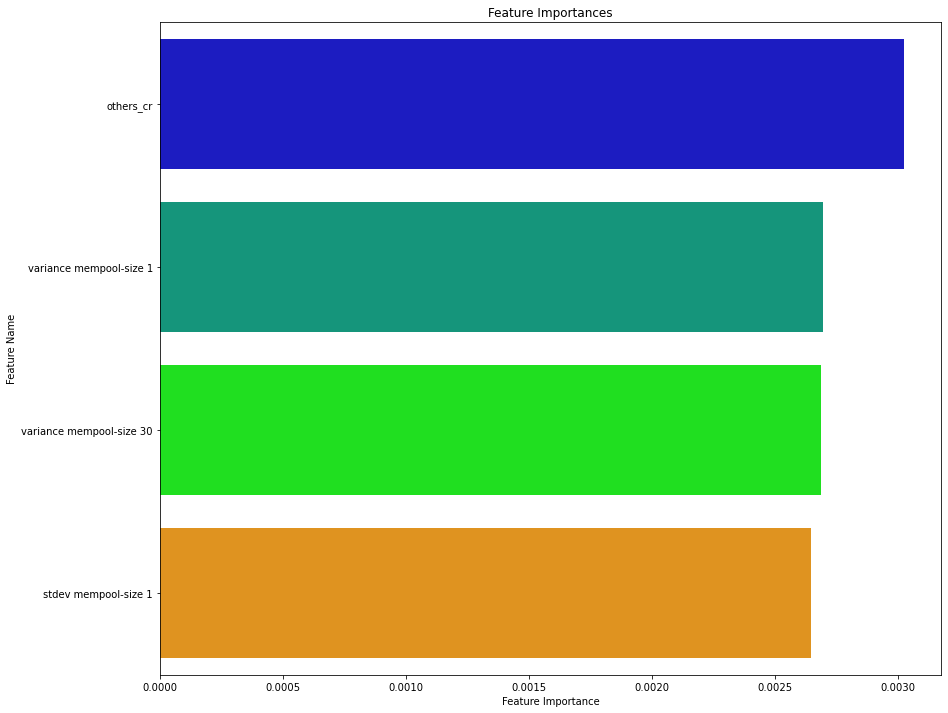

In [101]:
pd.options.display.max_rows = 6
feat_imp_df = pd.DataFrame(data = {"Feature Name": robust_data.columns,"Feature Importance":rf.feature_importances_})

feat_imp_df = feat_imp_df.sort_values("Feature Importance",ascending=False)[:]

fig,ax = plt.subplots(figsize=(14,12))
ax = sns.barplot(x = "Feature Importance",y = "Feature Name",
                data=feat_imp_df.sort_values("Feature Importance",ascending=False)[:4],palette="nipy_spectral")
plt.title('Feature Importances')

data_ready = robust_data[feat_imp_df["Feature Name"].values]
date = pd.date_range(start='2014-09-16', periods=len(data_ready), freq='D')
__data_ready = data_ready.assign(date =  date)
__data_ready = __data_ready.merge(pd.DataFrame(final_data['Predict close']), how ="left",on="date").drop(0)[:-8]

In [84]:
# On selectionne les 4 variables les plus importantes.
__data_ready = __data_ready[["others_cr", "variance mempool-size 1", "variance mempool-size 30", "stdev mempool-size 1",'Predict close',"date"]][:-7]

In [85]:
__data_ready

,others_cr,variance mempool-size 1,variance mempool-size 30,stdev mempool-size 1,Predict close,date
1,0.003655,0.000649,0.000649,0.017679,399.519989,2014-09-17
2,0.003216,0.000649,0.000649,0.017679,377.181000,2014-09-18
3,0.003425,0.000649,0.000649,0.017679,375.467010,2014-09-19
...,...,...,...,...,...,...
2626,0.847272,0.014356,0.014356,0.111508,49200.703125,2021-11-24
2627,0.792294,0.014431,0.014431,0.111822,49368.847656,2021-11-25
2628,0.810773,0.014467,0.014467,0.111972,50582.625000,2021-11-26


# Cross validation

### Cross validation pour les série temporelles.

In [86]:
train_window = 280
test_window = 46
train_splits = []
test_splits = []

for i in range(train_window, len(__data_ready),test_window):
    train_split = __data_ready[i-train_window:i]
    test_split = __data_ready[i:i+test_window]
    train_splits.append(train_split)
    test_splits.append(test_split)

# Modelisation

### GLM

In [35]:
import statsmodels.api as sm

glm_date_array = []
glm_y_test_array = []
glm_y_test_pred_array = []
glm_batch_id_array = []
glm_batch_id_array_result = []
glm_batch_mae_train_array = []
glm_batch_rmse_train_array = []
glm_batch_mae_test_array = []
glm_batch_rmse_test_array = []
glm_residuals = []

for i in range(len(train_splits)):
    
    Xtrain_split = train_splits[i].drop(['Predict close','date'],axis=1)
    Xtest_split = test_splits[i].drop(['Predict close','date'],axis=1)
    
    ytrain_split = train_splits[i]['Predict close'].reset_index(drop=True).values
    ytest_split = test_splits[i]['Predict close'].reset_index(drop=True).values
    

    Xtrain_split=sm.add_constant(Xtrain_split)
    Xtest_split=sm.add_constant(Xtest_split)
    glm_model = sm.GLM(ytrain_split, Xtrain_split, family=sm.families.Gaussian(link=sm.families.links.identity))
    glm_model = glm_model.fit()
    

    ytrain_pred = glm_model.predict(Xtrain_split)
    ytest_pred = glm_model.predict(Xtest_split)
    
    glm_residuals.extend(ytest_split-ytest_pred)
    glm_date_array.extend(test_splits[i]['date'])
    glm_y_test_array.extend(test_splits[i]['Predict close'])
    glm_y_test_pred_array.extend((ytest_pred.values.flatten()))
    glm_batch_id_array.extend([i]*len(test_splits[i]))
    
    MAE_train = mean_absolute_error(ytrain_split,ytrain_pred)
    RMSE_train = mean_squared_error(ytrain_split,ytrain_pred,squared=False)
    MAE_test = mean_absolute_error(ytest_split,ytest_pred)
    RMSE_test = mean_squared_error(ytest_split,ytest_pred,squared=False)
    
    glm_batch_id_array_result.append(i)
    glm_batch_mae_train_array.append(MAE_train)
    glm_batch_rmse_train_array.append(RMSE_train)
    glm_batch_mae_test_array.append(MAE_test)
    glm_batch_rmse_test_array.append(RMSE_test)

In [36]:
glm_result_test_df = pd.DataFrame()
glm_result_test_df['paquet'] = glm_batch_id_array
glm_result_test_df['Date'] = glm_date_array
glm_result_test_df['y_test'] = glm_y_test_array
glm_result_test_df['y_test_pred'] = glm_y_test_pred_array
glm_y_test_array = glm_result_test_df['y_test']
glm_y_test_pred_array = glm_result_test_df['y_test_pred']

glm_result_metrics_df = pd.DataFrame()
glm_result_metrics_df['paquet'] = glm_batch_id_array_result
glm_result_metrics_df['MAE_train'] = glm_batch_mae_train_array
glm_result_metrics_df['RMSE_train'] = glm_batch_rmse_train_array
glm_result_metrics_df['MAE_test'] = glm_batch_mae_test_array
glm_result_metrics_df['RMSE_test'] = glm_batch_rmse_test_array

glm_result_metrics_df
pd.DataFrame(data = {"Résultats GLM" :glm_result_metrics_df.mean()}).drop(['paquet'],axis=0)

,Résultats GLM
MAE_train,853.405332
RMSE_train,1154.733379
MAE_test,1322.403595
RMSE_test,1608.443770


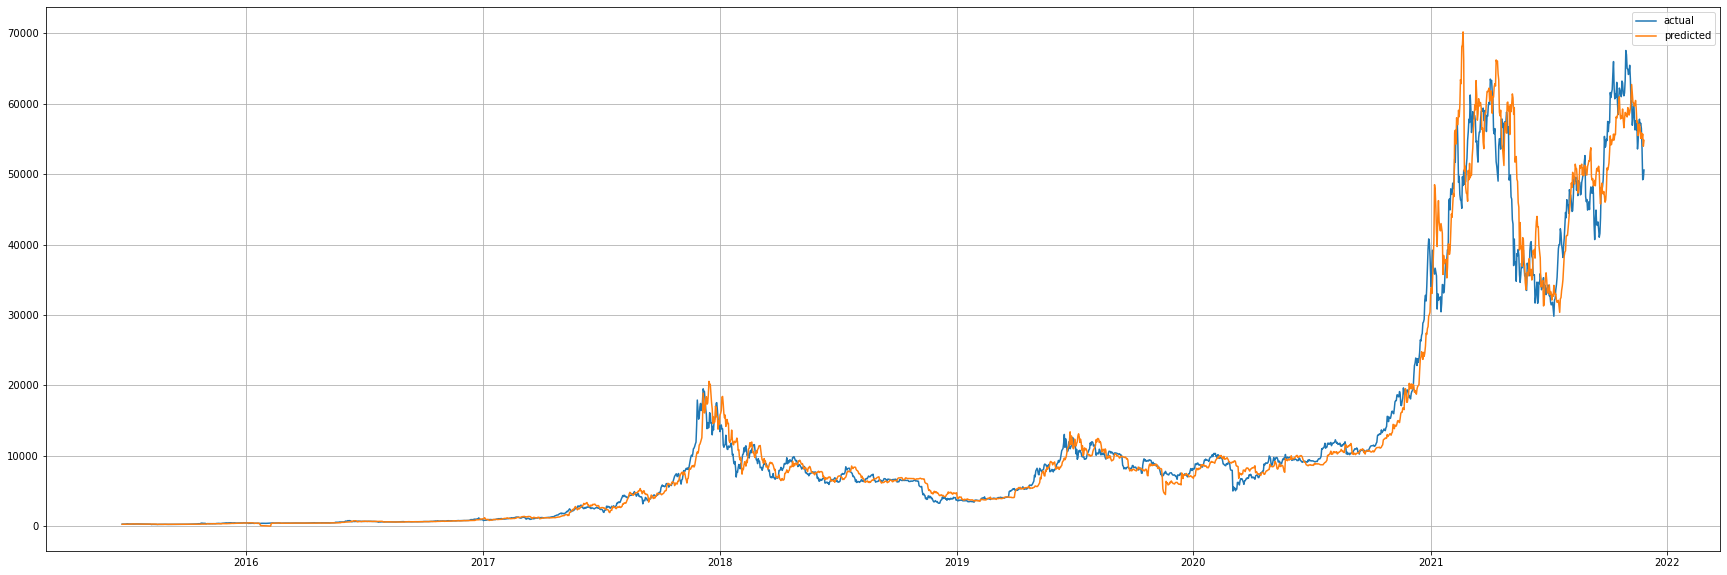

In [37]:
plt.figure(figsize=(30,10))
plt.plot(glm_date_array,glm_result_test_df["y_test"],label='actual')
plt.plot(glm_date_array,glm_result_test_df["y_test_pred"],label='predicted')
plt.legend()
plt.grid()
plt.show()


In [38]:
print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  280
Model:                            GLM   Df Residuals:                      276
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                      2.3512e+07
Method:                          IRLS   Log-Likelihood:                -2771.5
Date:                Thu, 13 Jan 2022   Deviance:                   6.4894e+09
Time:                        23:58:55   Pearson chi2:                 6.49e+09
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [39]:
# Le score R²
sumofsquares = 0
sumofresiduals = 0
for i in range(len(glm_result_test_df["y_test"])) :
    sumofsquares += (glm_result_test_df["y_test"][i] - np.mean(glm_result_test_df["y_test_pred"])) ** 2
    sumofresiduals += (glm_result_test_df["y_test"][i] - glm_result_test_df["y_test_pred"][i]) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.9712209294011765


<Figure size 1080x360 with 0 Axes>

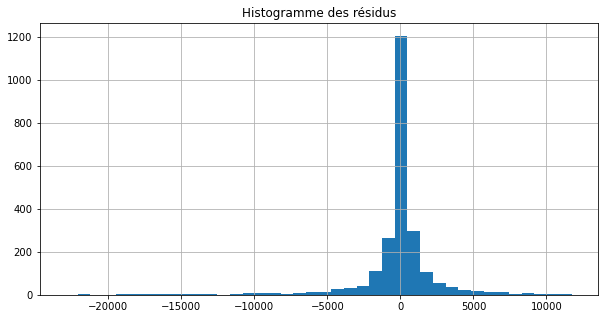

In [40]:
pyplot.figure(figsize=(15,5))
_residuals = pd.DataFrame(glm_residuals)
_residuals.hist(figsize=(10,5),bins = 40)
plt.title("Histogramme des résidus")
pyplot.show()

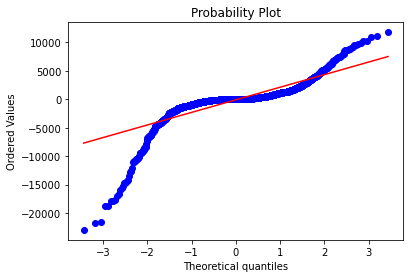

In [41]:
measurements = glm_residuals
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

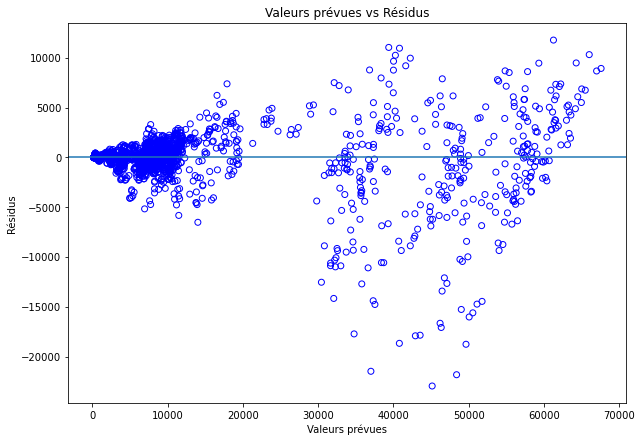

In [42]:
plt.figure(figsize=(10,7))
plt.scatter(glm_result_test_df["y_test"].values, glm_residuals,facecolors='none', edgecolors='b')
plt.axhline(y=0)
plt.xlabel("Valeurs prévues")
plt.ylabel("Résidus")
plt.title("Valeurs prévues vs Résidus")
plt.show()

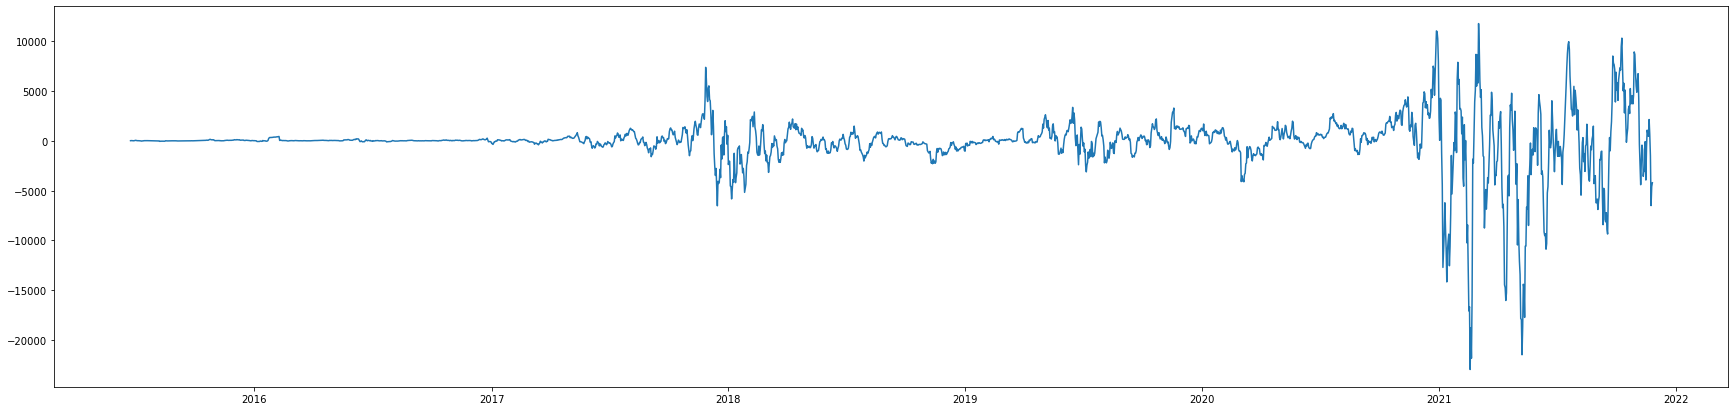

In [43]:
plt.figure(figsize=(30,7))
plt.plot(glm_date_array,glm_residuals)

In [44]:
durbin_watson(np.array(glm_residuals))

0.174987398089219

## GAM

In [45]:
from pygam import LogisticGAM, GAM

gam_date_array = []
gam_y_test_array = []
gam_y_test_pred_array = []
gam_batch_id_array = []
gam_batch_id_array_result = []
gam_batch_mae_train_array = []
gam_batch_rmse_train_array = []
gam_batch_mae_test_array = []
gam_batch_rmse_test_array = []
gam_residuals = []

for i in range(len(train_splits)):
    
    Xtrain_split = train_splits[i].drop(['Predict close','date'],axis=1)
    Xtest_split = test_splits[i].drop(['Predict close','date'],axis=1)
    
    ytrain_split = train_splits[i]['Predict close'].reset_index(drop=True).values
    ytest_split = test_splits[i]['Predict close'].reset_index(drop=True).values
    
    gam_model = GAM(distribution='normal',link='identity')
    gam_model.fit(Xtrain_split, ytrain_split)

    ytrain_pred = gam_model.predict(Xtrain_split)
    ytest_pred = gam_model.predict(Xtest_split)
    
    gam_residuals.extend(ytest_split-ytest_pred)
    gam_date_array.extend(test_splits[i]['date'])
    gam_y_test_array.extend(test_splits[i]['Predict close'])
    gam_y_test_pred_array.extend((ytest_pred.flatten()))
    gam_batch_id_array.extend([i]*len(test_splits[i]))
    
    MAE_train = mean_absolute_error(ytrain_split,ytrain_pred)
    RMSE_train = mean_squared_error(ytrain_split,ytrain_pred,squared=False)
    MAE_test = mean_absolute_error(ytest_split,ytest_pred)
    RMSE_test = mean_squared_error(ytest_split,ytest_pred,squared=False)
    
    gam_batch_id_array_result.append(i)
    gam_batch_mae_train_array.append(MAE_train)
    gam_batch_rmse_train_array.append(RMSE_train)
    gam_batch_mae_test_array.append(MAE_test)
    gam_batch_rmse_test_array.append(RMSE_test)


In [55]:
gam_result_test_df = pd.DataFrame()
gam_result_test_df['paquet'] = gam_batch_id_array
gam_result_test_df['Date'] = gam_date_array
gam_result_test_df['y_test'] = gam_y_test_array
gam_result_test_df['y_test_pred'] = gam_y_test_pred_array
gam_y_test_array = gam_result_test_df['y_test']
gam_y_test_pred_array = gam_result_test_df['y_test_pred']

gam_result_metrics_df = pd.DataFrame()
gam_result_metrics_df['paquet'] = gam_batch_id_array_result
gam_result_metrics_df['MAE_train'] = gam_batch_mae_train_array
gam_result_metrics_df['RMSE_train'] = gam_batch_rmse_train_array
gam_result_metrics_df['MAE_test'] = gam_batch_mae_test_array
gam_result_metrics_df['RMSE_test'] = gam_batch_rmse_test_array

gam_result_metrics_df
pd.DataFrame(data = {"Résultats GAM" :gam_result_metrics_df.mean()}).drop(['paquet'],axis=0)

,Résultats GAM
MAE_train,633.970632
RMSE_train,877.788731
MAE_test,2319.352585
RMSE_test,2722.721879


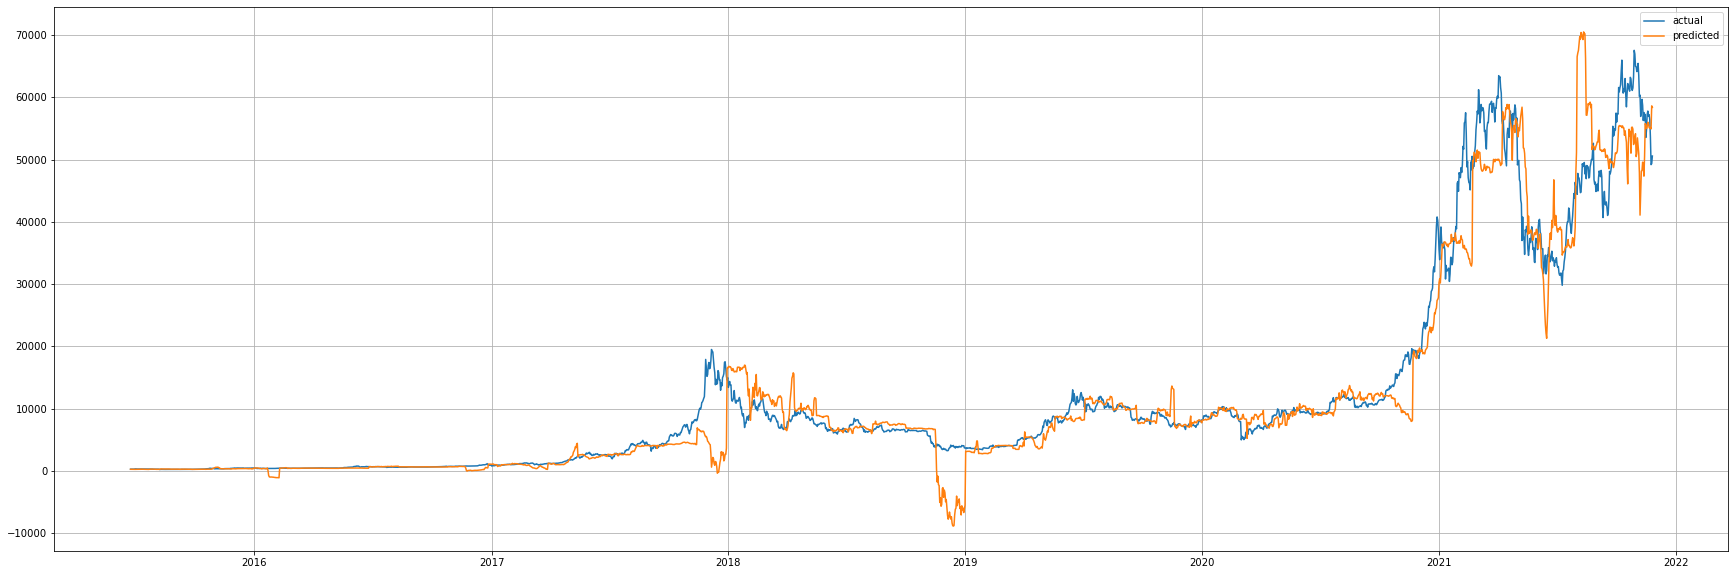

In [47]:
plt.figure(figsize=(30,10))
plt.plot(gam_date_array,gam_result_test_df["y_test"],label='actual')
plt.plot(gam_date_array,gam_result_test_df["y_test_pred"],label='predicted')
plt.legend()
plt.grid()
plt.show()

In [48]:
print(gam_model.summary())

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     23.5542
Link Function:                     IdentityLink Log Likelihood:                                 -4944.6042
Number of Samples:                          280 AIC:                                             9938.3169
                                                AICc:                                            9943.2489
                                                GCV:                                         21924110.2143
                                                Scale:                                       18631461.8244
                                                Pseudo R-Squared:                                   0.8284
Feature Function                  Lam

In [49]:
# Le score R²
sumofsquares = 0
sumofresiduals = 0
for i in range(len(gam_result_test_df["y_test"])) :
    sumofsquares += (gam_result_test_df["y_test"][i] - np.mean(gam_result_test_df["y_test_pred"])) ** 2
    sumofresiduals += (gam_result_test_df["y_test"][i] - gam_result_test_df["y_test_pred"][i]) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)



0.9251001705729343


<Figure size 1080x360 with 0 Axes>

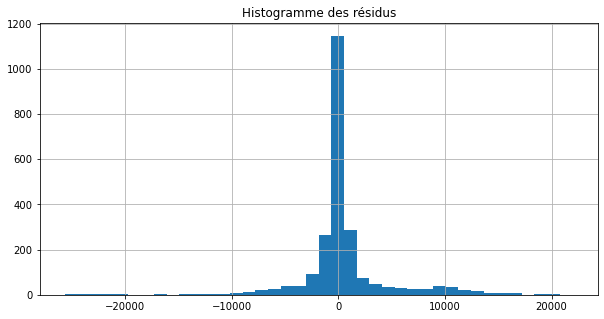

In [50]:
pyplot.figure(figsize=(15,5))
_residuals = pd.DataFrame(gam_residuals)
_residuals.hist(figsize=(10,5),bins = 40)
plt.title("Histogramme des résidus")
pyplot.show()

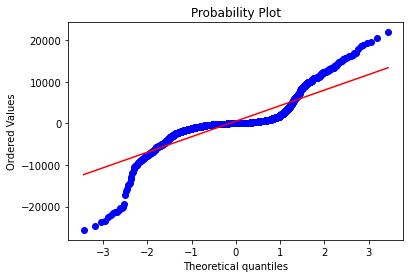

In [51]:
measurements = gam_residuals
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

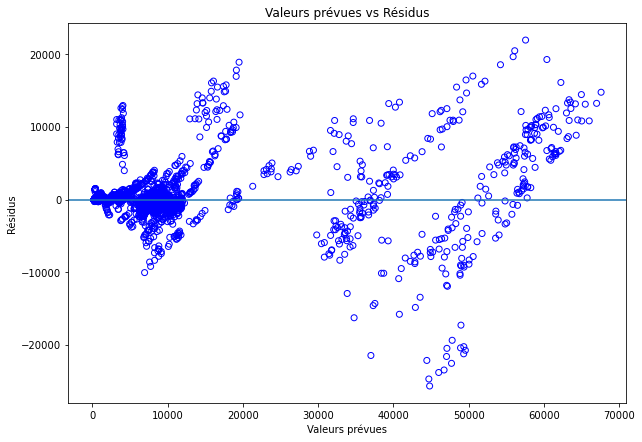

In [52]:
plt.figure(figsize=(10,7))
plt.scatter(gam_result_test_df["y_test"].values, gam_residuals,facecolors='none', edgecolors='b')
plt.axhline(y=0)
plt.xlabel("Valeurs prévues")
plt.ylabel("Résidus")
plt.title("Valeurs prévues vs Résidus")
plt.show()

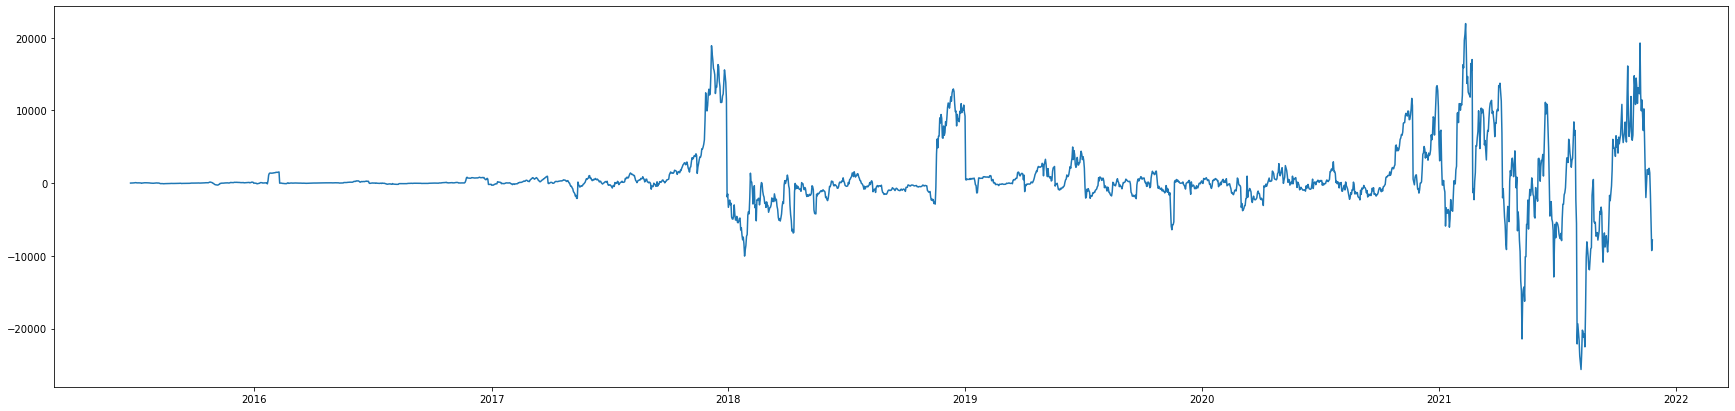

In [53]:
plt.figure(figsize=(30,7))
plt.plot(gam_date_array,gam_residuals)

In [54]:
durbin_watson(np.array(gam_residuals))

0.08686003256712736

## SVM (SVR)

In [130]:
svr_date_array = []
svr_y_test_array = []
svr_y_test_pred_array = []
svr_batch_id_array = []
svr_batch_id_array_result = []
svr_batch_mae_train_array = []
svr_batch_rmse_train_array = []
svr_batch_mae_test_array = []
svr_batch_rmse_test_array = []
svr_residuals = []

for i in range(len(train_splits)):
    Xtrain_split = train_splits[i].drop(['Predict close','date'],axis=1).values
    Xtest_split = test_splits[i].drop(['Predict close','date'],axis=1).values

    ytrain_split = train_splits[i]['Predict close'].reset_index(drop=True).values
    ytest_split = test_splits[i]['Predict close'].reset_index(drop=True).values

    svr = SVR(C=10000,gamma='auto',kernel='linear')
    svr.fit(Xtrain_split, ytrain_split)

    ytrain_pred = svr.predict(Xtrain_split)
    ytest_pred = svr.predict(Xtest_split)

    svr_residuals.extend(ytest_split-ytest_pred)
    
    MAE_train = mean_absolute_error(ytrain_split,ytrain_pred)
    RMSE_train = mean_squared_error(ytrain_split,ytrain_pred,squared=False)
    MAE_test = mean_absolute_error(ytest_split,ytest_pred)
    RMSE_test = mean_squared_error(ytest_split,ytest_pred,squared=False)

    svr_date_array.extend(test_splits[i]['date'])
    svr_y_test_array.extend(test_splits[i]['Predict close'])
    svr_y_test_pred_array.extend((ytest_pred.flatten()))
    svr_batch_id_array.extend([i]*len(test_splits[i]))

    svr_batch_id_array_result.append(i)
    svr_batch_mae_train_array.append(MAE_train)
    svr_batch_rmse_train_array.append(RMSE_train)
    svr_batch_mae_test_array.append(MAE_test)
    svr_batch_rmse_test_array.append(RMSE_test)

svr_result_test_df = pd.DataFrame()
svr_result_test_df['batch_id'] = svr_batch_id_array
svr_result_test_df['Date'] = svr_date_array
svr_result_test_df['y_test'] = svr_y_test_array
svr_result_test_df['y_test_pred'] = svr_y_test_pred_array
svr_y_test_array = svr_result_test_df['y_test']
svr_y_test_pred_array = svr_result_test_df['y_test_pred']
svr_result_metrics_df = pd.DataFrame()
svr_result_metrics_df['batch_id'] = svr_batch_id_array_result
svr_result_metrics_df['MAE_train'] = svr_batch_mae_train_array
svr_result_metrics_df['RMSE_train'] = svr_batch_rmse_train_array
svr_result_metrics_df['MAE_test'] = svr_batch_mae_test_array
svr_result_metrics_df['RMSE_test'] = svr_batch_rmse_test_array

In [131]:
pd.DataFrame(data = {"résultats SVR" :svr_result_metrics_df.mean()}).drop(['batch_id'])

,résultats SVR
MAE_train,870.733900
RMSE_train,1240.870041
MAE_test,1664.077430
RMSE_test,1926.862277


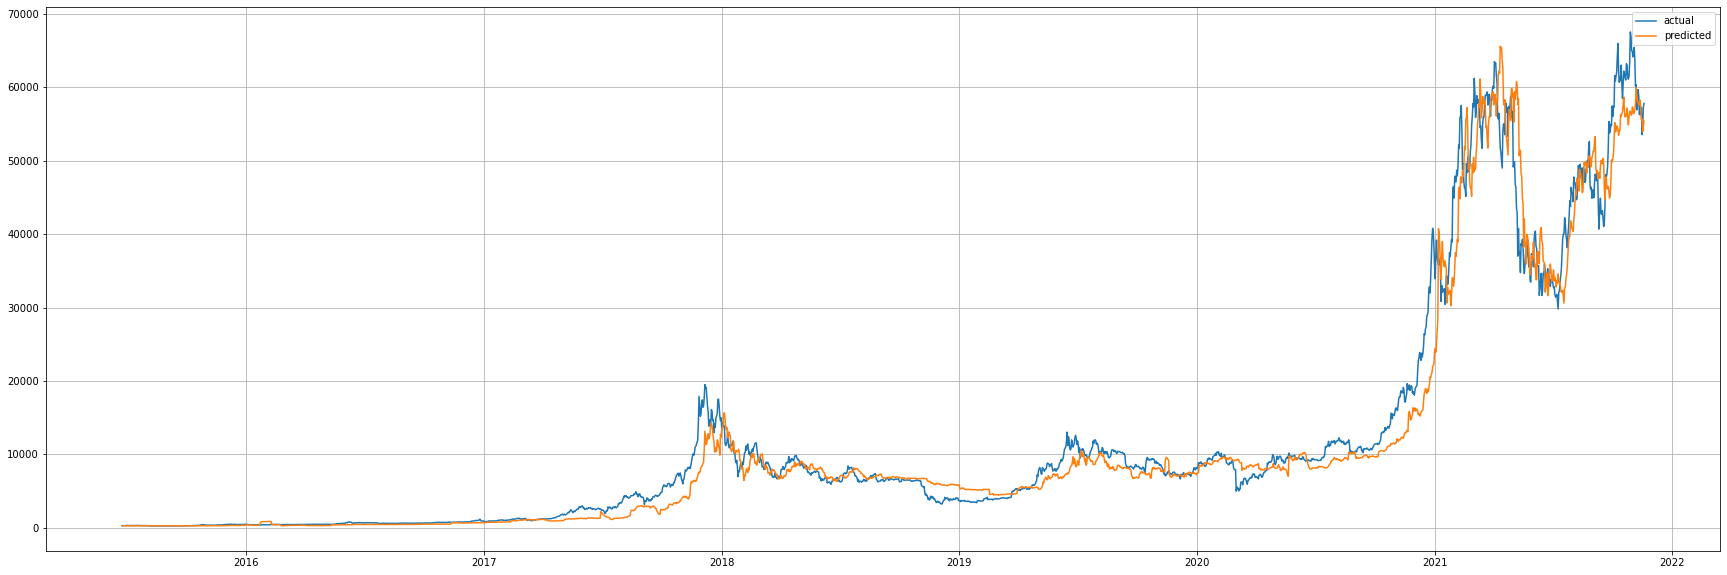

In [151]:
pd.DataFrame(svr_result_metrics_df.mean()).drop(['batch_id'])
plt.figure(figsize=(30,10))
plt.plot(svr_date_array,svr_result_test_df["y_test"],label='actual')
plt.plot(svr_date_array,svr_result_test_df["y_test_pred"],label='predicted')
plt.legend()
plt.grid()
plt.show()

In [132]:
# Le score R²
sumofsquares = 0
sumofresiduals = 0
for i in range(len(svr_result_test_df["y_test"])) :
    sumofsquares += (svr_result_test_df["y_test"][i] - np.mean(svr_result_test_df["y_test_pred"])) ** 2
    sumofresiduals += (svr_result_test_df["y_test"][i] - svr_result_test_df["y_test_pred"][i]) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)


0.9638792834791506


<Figure size 1080x360 with 0 Axes>

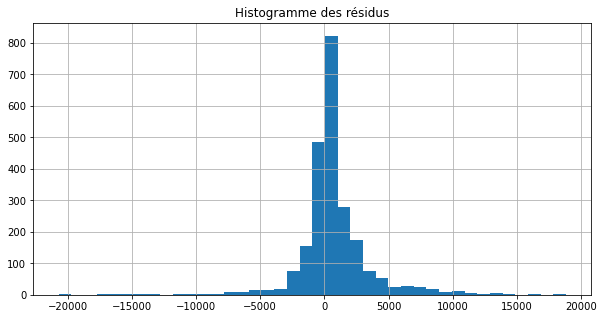

In [133]:
pyplot.figure(figsize=(15,5))
_residuals = pd.DataFrame(svr_residuals)
_residuals.hist(figsize=(10,5),bins = 40)
plt.title("Histogramme des résidus")
pyplot.show()

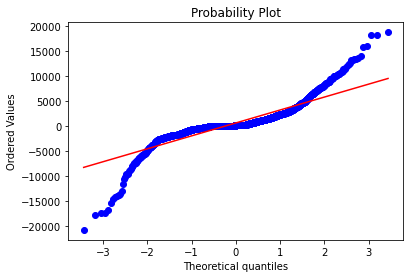

In [134]:
measurements = svr_residuals
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

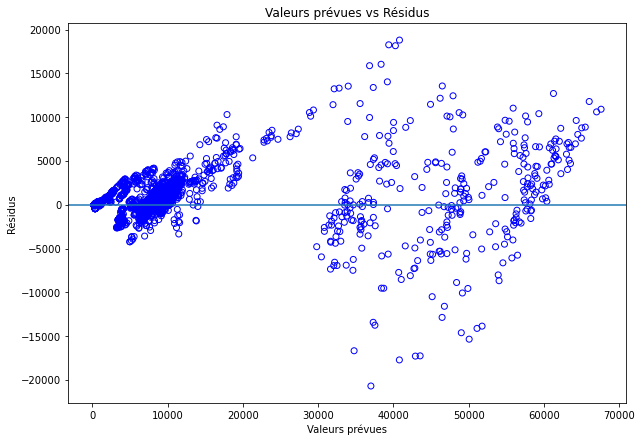

In [135]:
plt.figure(figsize=(10,7))
plt.scatter(svr_result_test_df["y_test"].values, svr_residuals,facecolors='none', edgecolors='b')
plt.axhline(y=0)
plt.xlabel("Valeurs prévues")
plt.ylabel("Résidus")
plt.title("Valeurs prévues vs Résidus")
plt.show()

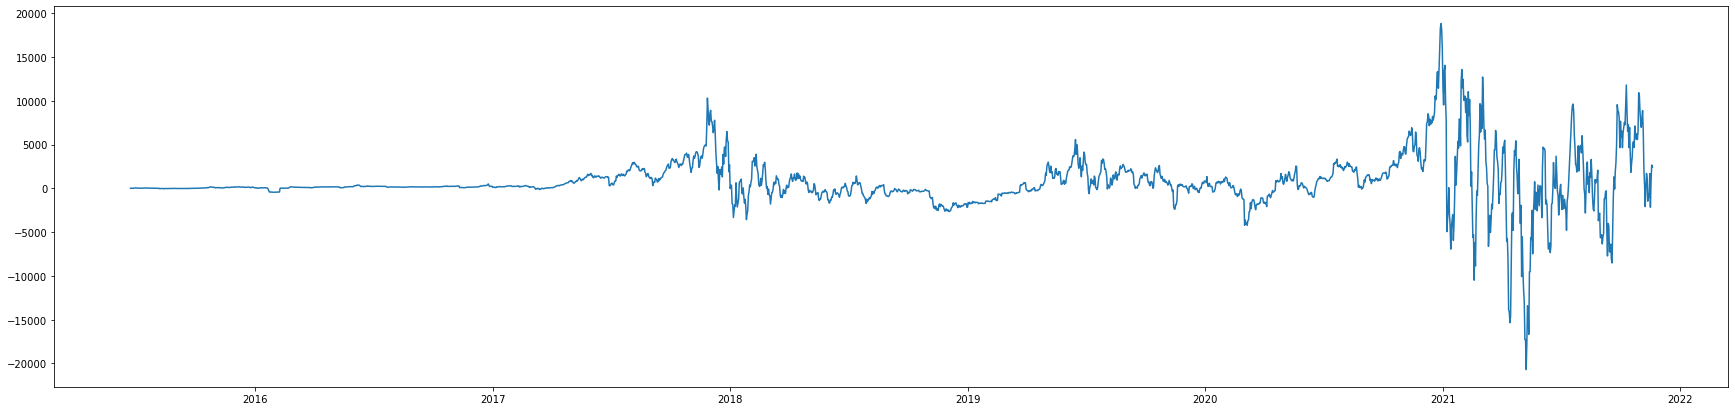

In [136]:
plt.figure(figsize=(30,7))
plt.plot(svr_date_array,svr_residuals)

In [137]:
durbin_watson(np.array(svr_residuals))

0.12401788017146365

## Regression Lasso

#### GridsearchCV

GridSearchCV est une méthode d’optimisation qui va nous permet de tester une série de paramètres et de comparer les performances pour en déduire le meilleur paramétrage.

On utilise GridSearchCV afin de trouver le bon $\alpha \in [1,32]$.

In [139]:
lasso_date_array = []
lasso_y_test_array = []
lasso_y_test_pred_array = []
lasso_batch_id_array = []
lasso_batch_id_array_result = []
lasso_batch_mae_train_array = []
lasso_batch_rmse_train_array = []
lasso_batch_mae_test_array = []
lasso_batch_rmse_test_array = []
lasso_residuals = []

for i in range(len(train_splits)):
    Xtrain_split = train_splits[i].drop(['Predict close','date'],axis=1)
    Xtest_split = test_splits[i].drop(['Predict close','date'],axis=1)
    ytrain_split = train_splits[i]['Predict close'].reset_index(drop=True).values
    ytest_split = test_splits[i]['Predict close'].reset_index(drop=True).values
    
    alphas = np.arange(1,32)
    model = Lasso()
    grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
    lasso_model = grid.fit(Xtrain_split,ytrain_split)
    ytrain_pred = lasso_model.predict(Xtrain_split)
    ytest_pred = lasso_model.predict(Xtest_split)

    lasso_date_array.extend(test_splits[i]['date'])
    lasso_y_test_array.extend(test_splits[i]['Predict close'])
    lasso_y_test_pred_array.extend((ytest_pred.flatten()))
    lasso_batch_id_array.extend([i]*len(test_splits[i]))
    
    lasso_residuals.extend(ytest_split-ytest_pred)
    
    MAE_train = mean_absolute_error(ytrain_split,ytrain_pred)
    RMSE_train = mean_squared_error(ytrain_split,ytrain_pred,squared=False)
    MAE_test = mean_absolute_error(ytest_split,ytest_pred)
    RMSE_test = mean_squared_error(ytest_split,ytest_pred,squared=False)
    
    lasso_batch_id_array_result.append(i)
    lasso_batch_mae_train_array.append(MAE_train)
    lasso_batch_rmse_train_array.append(RMSE_train)
    lasso_batch_mae_test_array.append(MAE_test)
    lasso_batch_rmse_test_array.append(RMSE_test)

In [142]:
lasso_result_test_df = pd.DataFrame()
lasso_result_test_df['paquet'] = lasso_batch_id_array
lasso_result_test_df['Date'] = lasso_date_array
lasso_result_test_df['y_test'] = lasso_y_test_array
lasso_result_test_df['y_test_pred'] = lasso_y_test_pred_array
lasso_y_test_array = lasso_result_test_df['y_test']
lasso_y_test_pred_array = lasso_result_test_df['y_test_pred']

lasso_result_metrics_df = pd.DataFrame()
lasso_result_metrics_df['paquet'] = lasso_batch_id_array_result
lasso_result_metrics_df['MAE_train'] = lasso_batch_mae_train_array
lasso_result_metrics_df['RMSE_train'] = lasso_batch_rmse_train_array
lasso_result_metrics_df['MAE_test'] = lasso_batch_mae_test_array
lasso_result_metrics_df['RMSE_test'] = lasso_batch_rmse_test_array

pd.DataFrame(data = {"Résultats Régression LASSO" : lasso_result_metrics_df.mean()}).drop(['paquet'],axis=0)

,Résultats Régression LASSO
MAE_train,811.574101
RMSE_train,1108.231375
MAE_test,1308.779887
RMSE_test,1594.593734


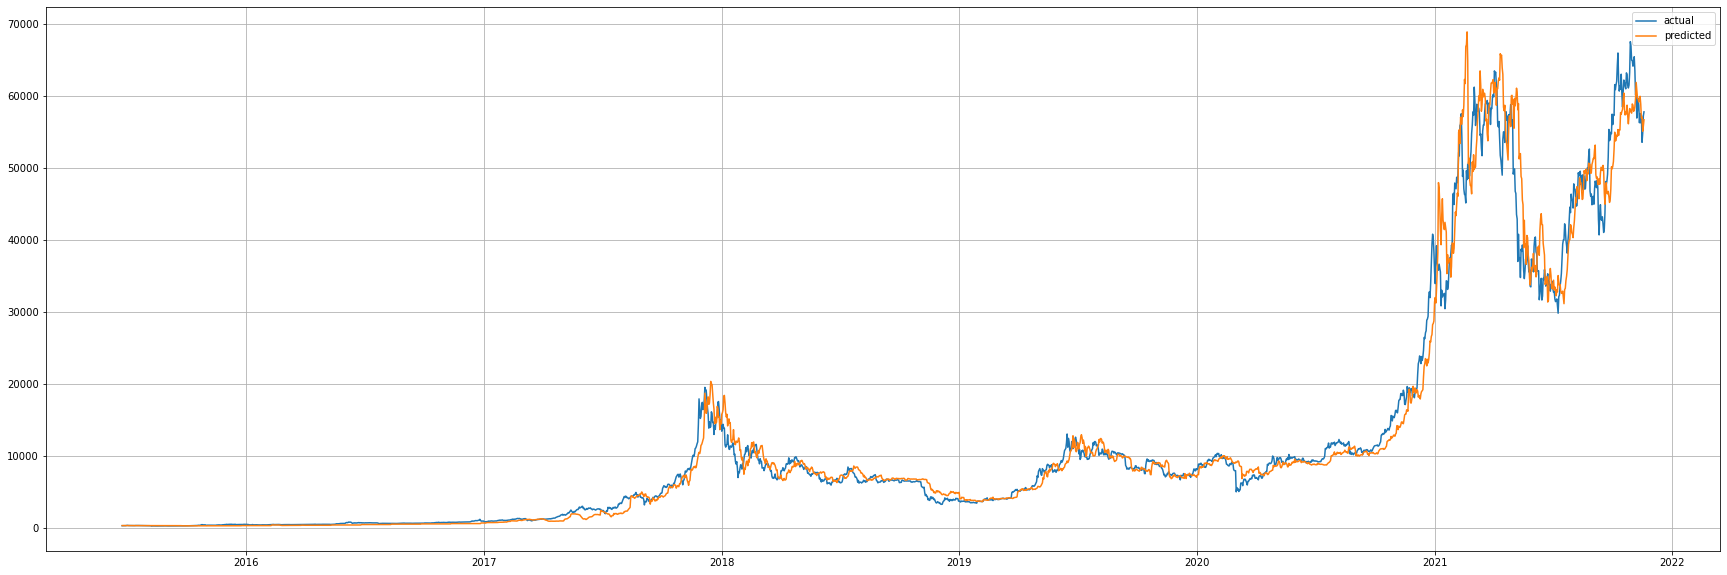

In [148]:
plt.figure(figsize=(30,10))
plt.plot(lasso_date_array,lasso_result_test_df["y_test"],label='actual')
plt.plot(lasso_date_array,lasso_result_test_df["y_test_pred"],label='predicted')
plt.legend()
plt.grid()
plt.show()

In [141]:
# Le score R²
sumofsquares = 0
sumofresiduals = 0
for i in range(len(lasso_result_test_df["y_test"])) :
    sumofsquares += (lasso_result_test_df["y_test"][i] - np.mean(lasso_result_test_df["y_test_pred"])) ** 2
    sumofresiduals += (lasso_result_test_df["y_test"][i] - lasso_result_test_df["y_test_pred"][i]) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.9711374486581085


<Figure size 1080x360 with 0 Axes>

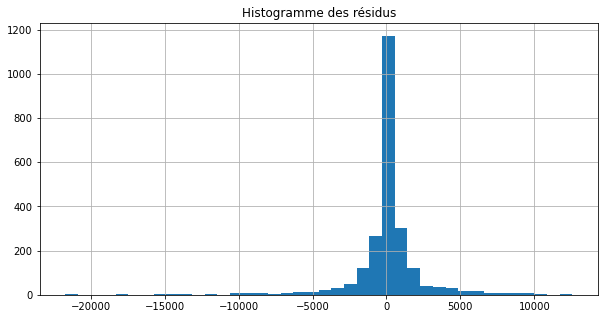

In [143]:
pyplot.figure(figsize=(15,5))
_residuals = pd.DataFrame(lasso_residuals)
_residuals.hist(figsize=(10,5),bins = 40)
plt.title("Histogramme des résidus")
pyplot.show()

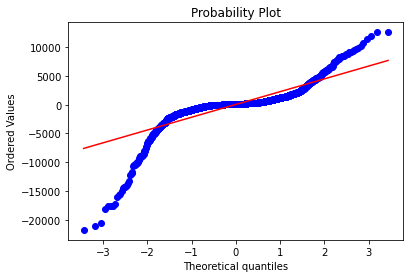

In [144]:
measurements = lasso_residuals
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

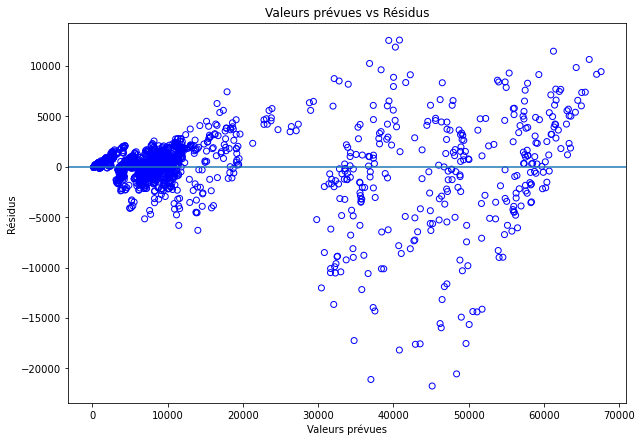

In [145]:
plt.figure(figsize=(10,7))
plt.scatter(lasso_result_test_df["y_test"].values, lasso_residuals,facecolors='none', edgecolors='b')
plt.axhline(y=0)
plt.xlabel("Valeurs prévues")
plt.ylabel("Résidus")
plt.title("Valeurs prévues vs Résidus")
plt.show()

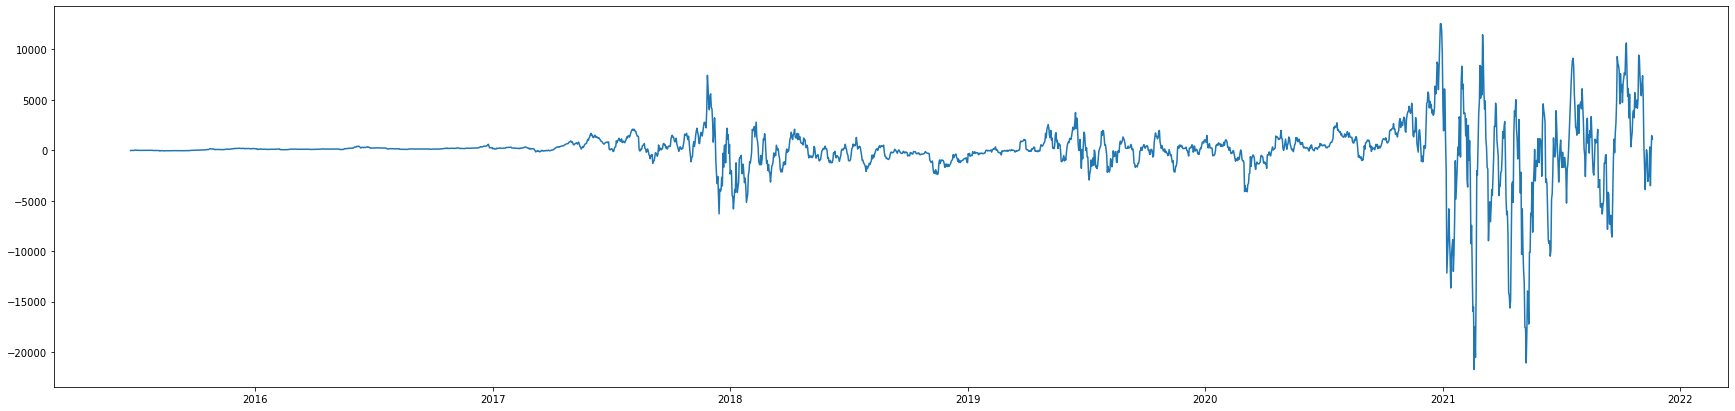

In [146]:
plt.figure(figsize=(30,7))
plt.plot(lasso_date_array,lasso_residuals)

In [147]:
durbin_watson(np.array(lasso_residuals))

0.17252620170627475

## Regression ridge

On utilise GridSearchCV afin de trouver le bon $\alpha \in [1,30]$.

In [154]:
ridge_date_array = []
ridge_y_test_array = []
ridge_y_test_pred_array = []
ridge_batch_id_array = []
ridge_batch_id_array_result = []
ridge_batch_mae_train_array = []
ridge_batch_rmse_train_array = []
ridge_batch_mae_test_array = []
ridge_batch_rmse_test_array = []
ridge_residuals = []

for i in range(len(train_splits)):
    Xtrain_split = train_splits[i].drop(['Predict close','date'],axis=1)
    Xtest_split = test_splits[i].drop(['Predict close','date'],axis=1)
    ytrain_split = train_splits[i]['Predict close'].reset_index(drop=True).values
    ytest_split = test_splits[i]['Predict close'].reset_index(drop=True).values
    
    alphas = np.arange(1,30)
    model = Ridge()
    params_grid = { 
    'alpha': alphas,
    'normalize' : [True,False]}
    grid = GridSearchCV(estimator=model, param_grid=params_grid)
    ridge_model = grid.fit(Xtrain_split,ytrain_split)
    ytrain_pred = ridge_model.predict(Xtrain_split)
    ytest_pred = sgd_reg.predict(Xtest_split)

    ridge_date_array.extend(test_splits[i]['date'])
    ridge_y_test_array.extend(test_splits[i]['Predict close'])
    ridge_y_test_pred_array.extend((ytest_pred.flatten()))
    ridge_batch_id_array.extend([i]*len(test_splits[i]))
    
    ridge_residuals.extend(ytest_split-ytest_pred)

    MAE_train = mean_absolute_error(ytrain_split,ytrain_pred)
    RMSE_train = mean_squared_error(ytrain_split,ytrain_pred,squared=False)
    MAE_test = mean_absolute_error(ytest_split,ytest_pred)
    RMSE_test = mean_squared_error(ytest_split,ytest_pred,squared=False)
    
    ridge_batch_id_array_result.append(i)
    ridge_batch_mae_train_array.append(MAE_train)
    ridge_batch_rmse_train_array.append(RMSE_train)
    ridge_batch_mae_test_array.append(MAE_test)
    ridge_batch_rmse_test_array.append(RMSE_test)

In [155]:
ridge_result_test_df = pd.DataFrame()
ridge_result_test_df['paquet'] = ridge_batch_id_array
ridge_result_test_df['Date'] = ridge_date_array
ridge_result_test_df['y_test'] = ridge_y_test_array
ridge_result_test_df['y_test_pred'] = ridge_y_test_pred_array
ridge_y_test_array = ridge_result_test_df['y_test']
ridge_y_test_pred_array = ridge_result_test_df['y_test_pred']

ridge_result_metrics_df = pd.DataFrame()
ridge_result_metrics_df['paquet'] = ridge_batch_id_array_result
ridge_result_metrics_df['MAE_train'] = ridge_batch_mae_train_array
ridge_result_metrics_df['RMSE_train'] = ridge_batch_rmse_train_array
ridge_result_metrics_df['MAE_test'] = ridge_batch_mae_test_array
ridge_result_metrics_df['RMSE_test'] = ridge_batch_rmse_test_array

pd.DataFrame(data = {"Résultats régression ridge" : ridge_result_metrics_df.mean()}).drop(['paquet'],axis=0)

,Résultats régression ridge
MAE_train,1067.260710
RMSE_train,1373.390590
MAE_test,1813.159776
RMSE_test,2088.900069


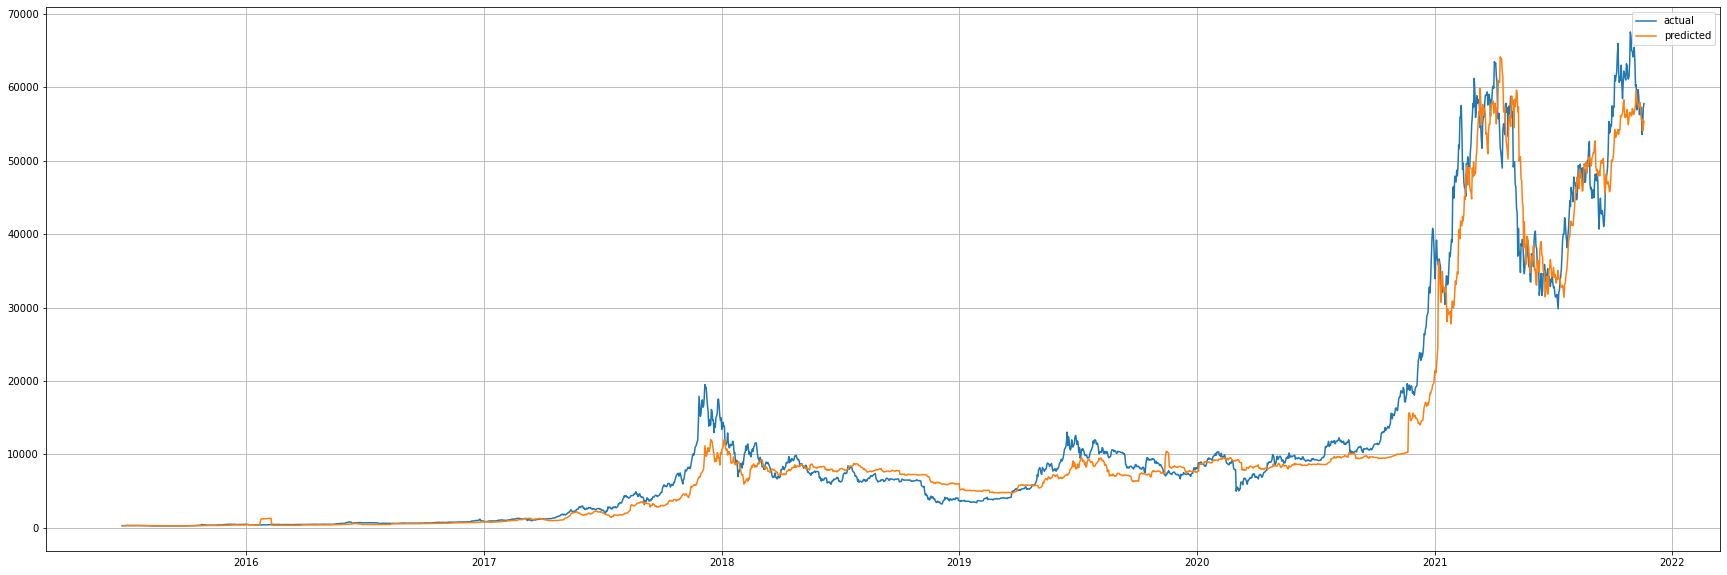

In [156]:
plt.figure(figsize=(30,10))
plt.plot(ridge_date_array,ridge_result_test_df["y_test"],label='actual')
plt.plot(ridge_date_array,ridge_result_test_df["y_test_pred"],label='predicted')
plt.legend()
plt.grid()
plt.show()

In [157]:
# Le score R² 
sumofsquares = 0
sumofresiduals = 0
for i in range(len(ridge_result_test_df["y_test"])) :
    sumofsquares += (ridge_result_test_df["y_test"][i] - np.mean(ridge_result_test_df["y_test_pred"])) ** 2
    sumofresiduals += (ridge_result_test_df["y_test"][i] - ridge_result_test_df["y_test_pred"][i]) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.9562120057298775


<Figure size 1080x360 with 0 Axes>

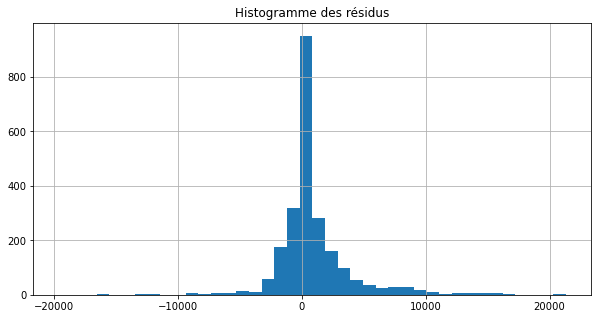

In [158]:
pyplot.figure(figsize=(15,5))
_residuals = pd.DataFrame(ridge_residuals)
_residuals.hist(figsize=(10,5),bins = 40)
plt.title("Histogramme des résidus")
pyplot.show()

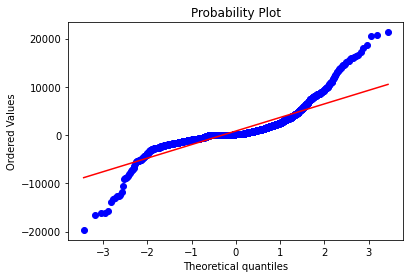

In [159]:
measurements = ridge_residuals
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

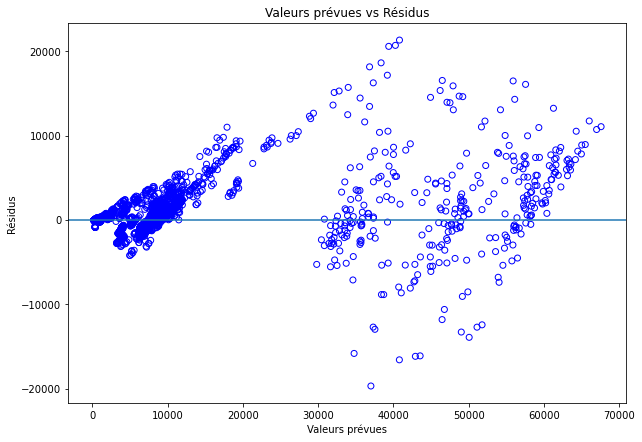

In [160]:
plt.figure(figsize=(10,7))
plt.scatter(ridge_result_test_df["y_test"].values, ridge_residuals,facecolors='none', edgecolors='b')
plt.axhline(y=0)
plt.xlabel("Valeurs prévues")
plt.ylabel("Résidus")
plt.title("Valeurs prévues vs Résidus")
plt.show()

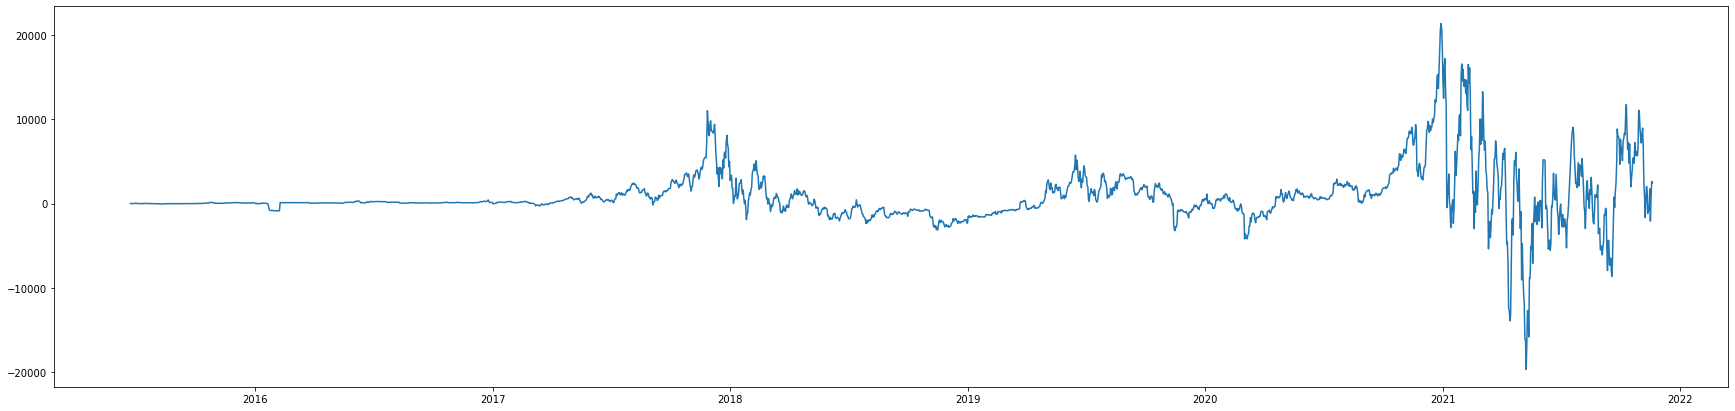

In [161]:
plt.figure(figsize=(30,7))
plt.plot(ridge_date_array,ridge_residuals)

In [162]:
durbin_watson(np.array(ridge_residuals))

0.09332300942772336

## RNN LSTM 

In [40]:
lstm_date_array = []
lstm_y_test_array = []
lstm_y_test_pred_array = []
lstm_batch_id_array = []
lstm_batch_id_array_result = []
lstm_batch_mae_train_array = []
lstm_batch_rmse_train_array = []
lstm_batch_mae_test_array = []
lstm_batch_rmse_test_array = []
lstm_residuals = []

for i in range(len(train_splits)):
    Xtrain_split = train_splits[i].drop(['Predict close','date'],axis=1)
    Xtest_split = test_splits[i].drop(['Predict close','date'],axis=1)
    ytrain_split = train_splits[i]['Predict close'].reset_index(drop=True).values
    ytest_split = test_splits[i]['Predict close'].reset_index(drop=True).values
    n_steps = 3
    n_features = 1
    Xtrain_split = np.array(Xtrain_split).reshape((Xtrain_split.shape[0], Xtrain_split.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(units =50, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dropout(0.25))
    model.add(Dense(2))
    model.compile(optimizer='adam', loss='mse')
    model.fit(Xtrain_split, np.array(ytrain_split), batch_size = 32,epochs=200, verbose=0)
    ytrain_pred = model.predict(Xtrain_split,verbose=0)
    ytest_pred = model.predict(np.array(Xtest_split).reshape((Xtest_split.shape[0], Xtest_split.shape[1], n_features)),verbose=0)


    lstm_date_array.extend(test_splits[i]['date'])
    lstm_y_test_array.extend(test_splits[i]['Predict close'])
    lstm_y_test_pred_array.extend((ytest_pred[:,0].flatten()))
    lstm_batch_id_array.extend([i]*len(test_splits[i]))
    
    lstm_residuals.extend(ytest_split-ytest_pred[:,0])
    
    MAE_train = mean_absolute_error(ytrain_split,ytrain_pred[:,0])
    RMSE_train = mean_squared_error(ytrain_split,ytrain_pred[:,0],squared=False)
    MAE_test = mean_absolute_error(ytest_split,ytest_pred[:,0])
    RMSE_test = mean_squared_error(ytest_split,ytest_pred[:,0],squared=False)
    
    lstm_batch_id_array_result.append(i)
    lstm_batch_mae_train_array.append(MAE_train)
    lstm_batch_rmse_train_array.append(RMSE_train)
    lstm_batch_mae_test_array.append(MAE_test)
    lstm_batch_rmse_test_array.append(RMSE_test)

In [44]:
lstm_result_test_df = pd.DataFrame()
lstm_result_test_df['paquet'] = lstm_batch_id_array
lstm_result_test_df['Date'] = lstm_date_array
lstm_result_test_df['y_test'] = lstm_y_test_array
lstm_result_test_df['y_test_pred'] = lstm_y_test_pred_array
lstm_y_test_array = lstm_result_test_df['y_test']
lstm_y_test_pred_array = lstm_result_test_df['y_test_pred']

lstm_result_metrics_df = pd.DataFrame()
lstm_result_metrics_df['paquet'] = lstm_batch_id_array_result
lstm_result_metrics_df['MAE_train'] = lstm_batch_mae_train_array
lstm_result_metrics_df['RMSE_train'] = lstm_batch_rmse_train_array
lstm_result_metrics_df['MAE_test'] = lstm_batch_mae_test_array
lstm_result_metrics_df['RMSE_test'] = lstm_batch_mae_test_array

pd.DataFrame(data = {"résultats LSTM model":lstm_result_metrics_df.mean()}).drop(['paquet'],axis=0)

,résultats LSTM model
MAE_train,1125.069972
RMSE_train,1439.612521
MAE_test,1750.770970
RMSE_test,1750.770970


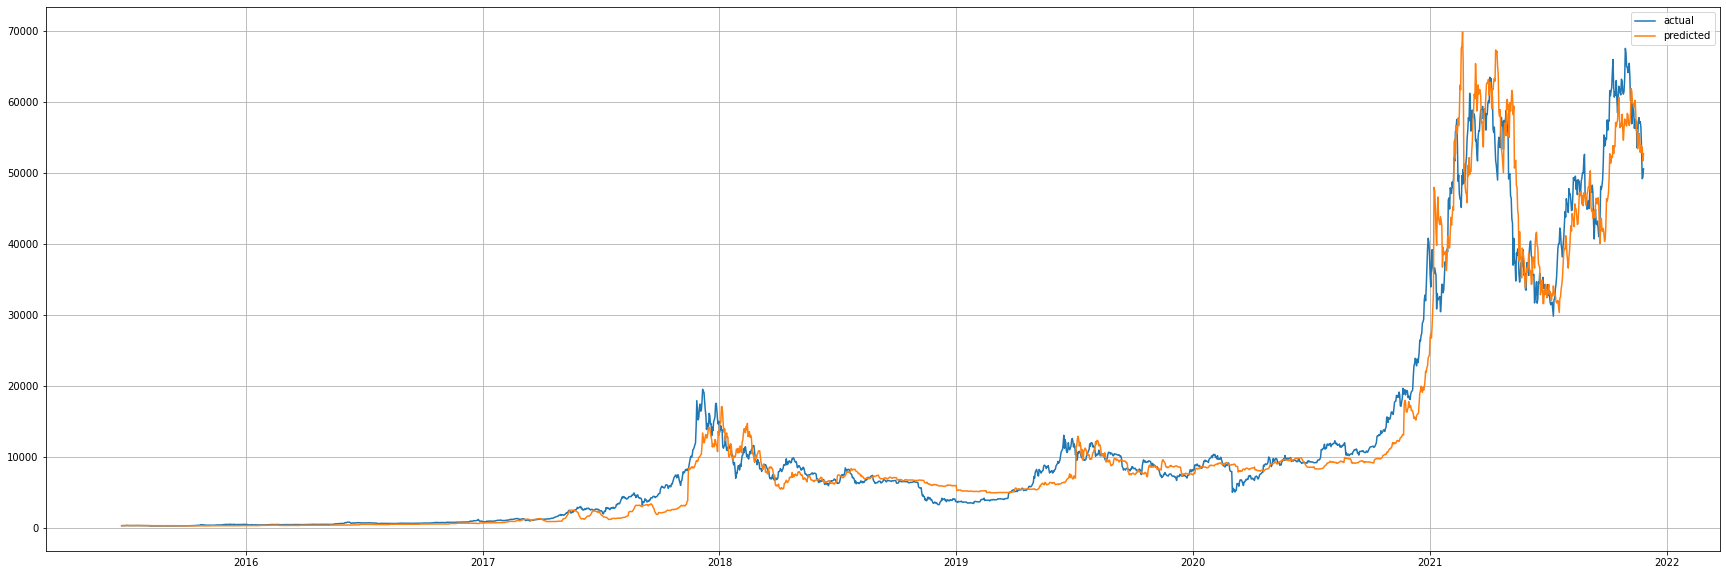

In [47]:
plt.figure(figsize=(30,10))
plt.plot(lstm_date_array,lstm_result_test_df["y_test"],label='actual')
plt.plot(lstm_date_array,lstm_result_test_df["y_test_pred"],label='predicted')
plt.legend()
plt.grid()
plt.show()

In [51]:
# Le score R² 
sumofsquares = 0
sumofresiduals = 0
for i in range(len(lstm_result_test_df["y_test"])) :
    sumofsquares += (lstm_result_test_df["y_test"][i] - np.mean(lstm_result_test_df["y_test_pred"])) ** 2
    sumofresiduals += (lstm_result_test_df["y_test"][i] - lstm_result_test_df["y_test_pred"][i]) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.9597585281601131


<Figure size 1080x360 with 0 Axes>

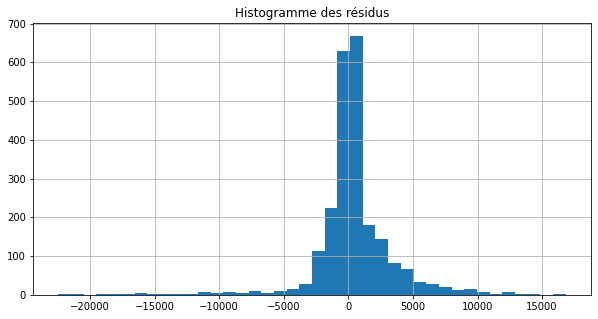

In [52]:
pyplot.figure(figsize=(15,5))
_residuals = pd.DataFrame(lstm_residuals)
_residuals.hist(figsize=(10,5),bins = 40)
plt.title("Histogramme des résidus")
pyplot.show()

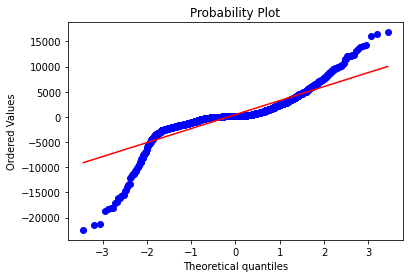

In [53]:
measurements = lstm_residuals
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

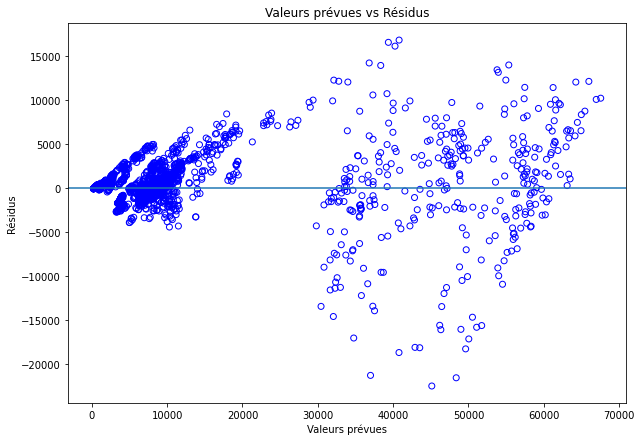

In [54]:
plt.figure(figsize=(10,7))
plt.scatter(lstm_result_test_df["y_test"].values, lstm_residuals,facecolors='none', edgecolors='b')
plt.axhline(y=0)
plt.xlabel("Valeurs prévues")
plt.ylabel("Résidus")
plt.title("Valeurs prévues vs Résidus")
plt.show()

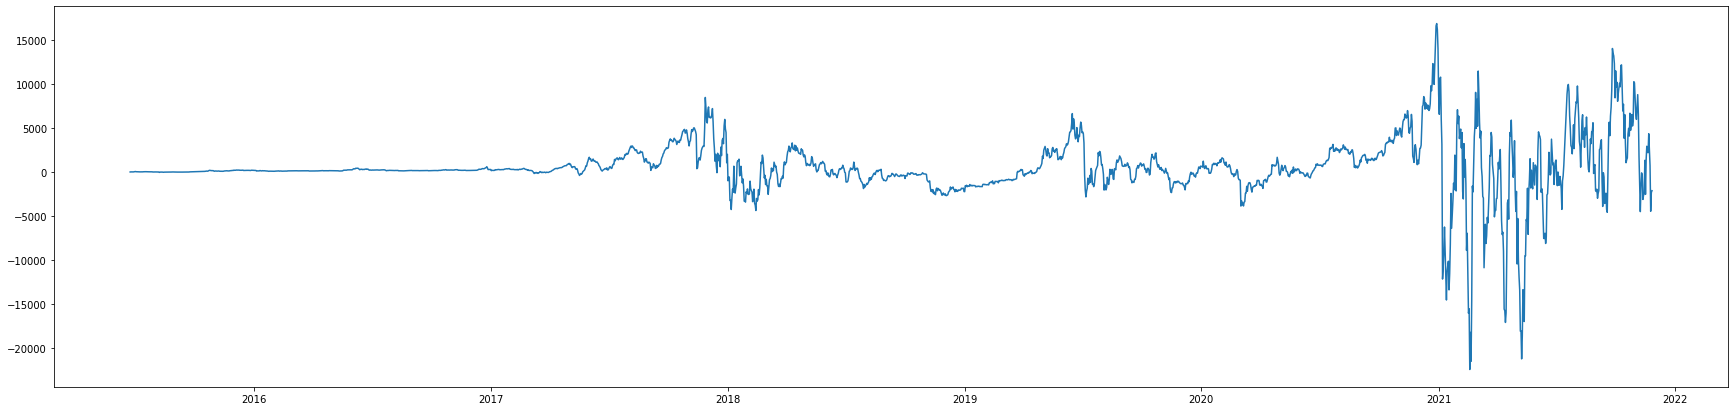

In [55]:
plt.figure(figsize=(30,7))
plt.plot(lstm_date_array,lstm_residuals)

In [56]:
durbin_watson(np.array(lstm_residuals))

0.13853294429276297